# Мобильные приложения — Выделение групп пользователей на основе поведения

<hr style="border: 2px solid green;" />

**Задача**

Выделить группы пользователей, которые различаются по метрикам:

1. retention rate (насколько долго клиент остаётся с компанией),
2. время, проведённое в приложении, 
3. частота действий, 
4. конверсия в целевое действие — просмотр контактов.

- Провести исследовательский анализ данных
- Сегментировать пользователей на основе действий
- Проверить статистические гипотезы:
    1. *Некоторые пользователи установили приложение по ссылке из `yandex`, другие — из `google`. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.*
    2. *Сформулируйте собственную гипотезу. Дополните её нулевой и альтернативной гипотезами. Проведите статистический тест.*
    
<hr style="border: 2px solid green;" />
    
**Описание данных**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:   
`event.time` — время совершения    
`event.name` — название события    
`user.id` — идентификатор пользователя    

Датасет **mobile_sources.csv** содержит колонки:    
`userId` — идентификатор пользователя    
`source` — источник, с которого пользователь установил приложение    

Расшифровки событий:    
`advert_open` — открытие карточки объявления    
`photos_show` — просмотр фотографий в объявлении    
`tips_show` — пользователь увидел рекомендованные объявления    
`tips_click` — пользователь кликнул по рекомендованному объявлению    
`contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления    
`contacts_call` — пользователь позвонил по номеру телефона на карточке объявления    
`map` — пользователь открыл карту размещенных объявлений    
`search_1` — `search_7` — разные события, связанные с поиском по сайту    
`favorites_add` — добавление объявления в избранное

<hr style="border: 2px solid green;" />

По итогам исследования подготовить презентацию и дашборд

## Декомпозиция

### предобработка данных:
- проверить пропуски
- проверить типы данных
- проверить наличие явных/неявных дубликатов
- привести заголовки колонок к змеиному регистру

### исследовательский анализ данных:
- Исследовать распределение данных
- Выявить аномалии/выбросы
- Определить сессии пользователей
- **Рассчитать retention rate (насколько долго клиент остаётся с компанией)**
- **Рассчитать сколько времени пользователи проводит в приложении**
- **Как часто совершает действие**
- **Определить конверсия в целевое действие — просмотр контактов**

### проверка гипотез:
- Определить признак разбиения пользователей на группы
- Пользователи какой группы склонны часто возвращаться в мобильное приложение (retention rate)?
- Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?
- Какая группа лучше и по какому признаку
- Пользователи пришедшие в приложение из разных источников демонстрируют разную конверсию в просмотры контактов
- Собственная гипотеза. `h0` - Пользователи, добавившие объявление в избранное `favorites_add` чаще доходят до целевого действия - позвонить продавцу `contacts_show`.

### работа с метриками и бизнес-показателями:

- Выдвинуть предположение, как улучшить приложение с точки зрения пользовательского опыта!

### подготовка презентации.

<hr style="border: 2px solid green;" />

Импортируем библиотеки

In [1]:
# импортируем библиотеку обработки и анализа структурированных данных
import pandas as pd
pd.set_option('display.max_colwidth', None)

# импортируем библиотеку для визуализации данных двумерной и трёхмерной графикой
import matplotlib.pyplot as plt
%matplotlib inline

# импортируем библиотеку для визуализации данных
import plotly.graph_objects as go
import plotly.express as px

# импортируем библиотеку математических вычислений
import numpy as np

# импортируем модуль для работы с датой и временем
import datetime as dt

# импортируем статистические функции
import scipy.stats as stats

# импортируем библиотеку для создания статистических графиков
import seaborn as sns

# импортируем библиотеку с математическими функциями
import math as mth

# импортируем модуль регулярных выражений
import re

# подключаем модуль для работы с JSON-форматом
import json

import requests

# импортируем карту, хороплет, и маркер
from folium import Map, Choropleth, Marker

# импортируем кластер
from folium.plugins import MarkerCluster

# импортируем библиотеку математических функций
from scipy import stats as st

from datetime import datetime, timedelta

In [2]:
# поместим данные в датафреймы
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

<hr style="border: 2px solid green;" />

## Предобработка данных

### датафрейм `mobile_sourсes`

In [3]:
# посмотрим информацию о датафрейме mobile_sourсes
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


4293 записи.    
Посмотрим из чего состоит `userId`, возможно тип `object` изменим на `int`.   
Солбец `source` имеет верный тип данных.

In [4]:
# посмотрим первые 5 строк
mobile_sourсes.head()

userId  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google

Нестандартный идентификатор пользователя. Изменять тип данных не нужно.

In [5]:
# приведём назнание колонок к змеиному регистру
mobile_sourсes = mobile_sourсes.rename(columns = {'userId': 'user_id'})

In [6]:
# проверим уникальность id пользователей
len(mobile_sourсes.user_id.unique())

4293

Число уникальных идентификаторов пользователей равно числу строк.    
Делаем вывод - дубликатов нет.

### Датафрейм `mobile_dataset`

In [7]:
# посмотрим общую информацию о датафрейме mobile_dataset
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


В названиях столбцов предыдущего датафррейма использовалась верблюжья нотация. В `mobile_dataset` разделителем между слов выступает точка. Вероятно, данные выгружались с разных источников.

**74 107** записей.    
Требуется переименование столбцов.    
Пропусков нет.    
Столбец, содержащий сведения о времени требует изменения типа данных.

In [8]:
mobile_dataset.head()

event.time   event.name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user.id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c

`event.time` содержит микросекунды. Коварный Яндекс.Практикум что-то задумал...

In [9]:
# посмотрим полные дубликаты
mobile_dataset.duplicated().sum()

0

In [10]:
# переименуем все колонки
mobile_dataset.columns = ['time', 'event', 'user_id']

Проверим, что число уникальных пользователей совпадает. В первом датафрейме мы получили 4293.

In [11]:
len(mobile_dataset.user_id.unique())

4293

Из входных данных известно, что в колонке `event` есть события с разным наименованием, но означающие одинаковое действие.    
Для `contacts_show` и `show_contacts` установим единое название.    
Решение об объединении `search_1` — `search_7` примем в ходе анализа данных

In [12]:
# зададим одинаковое название
mobile_dataset.loc[mobile_dataset['event'] == 'show_contacts', 'event'] = 'contacts_show'

In [13]:
# установим тип данных дата, время
mobile_dataset.time = pd.to_datetime(mobile_dataset.time)

In [14]:
# создадим копию столбца дата, время
mobile_dataset['time_sec'] = mobile_dataset.time

# удалим микросекунды
mobile_dataset['time_sec'] = mobile_dataset.time_sec.dt.floor(freq='S')

In [15]:
# проверим, что мы - молодцы
mobile_dataset.head()

time        event  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:02.245341    tips_show   
3 2019-10-07 00:00:07.039334    tips_show   
4 2019-10-07 00:00:56.319813  advert_open   

                                user_id            time_sec  
0  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07 00:00:00  
1  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07 00:00:01  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c 2019-10-07 00:00:02  
3  020292ab-89bc-4156-9acf-68bc2783f894 2019-10-07 00:00:07  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c 2019-10-07 00:00:56

Проверим наличие полных дубликатов отбросив микросекунды

In [16]:
# Скопируем три столбца
duplicateRows = mobile_dataset[['event', 'user_id', 'time_sec']]

# оставим строки - полные дубликаты
duplicateRows = duplicateRows[duplicateRows.duplicated()]
print('Количество полных дубликатов =', len(duplicateRows))
print()
print('% от всех записей =', round(len(duplicateRows) * 100 / len(mobile_dataset), 2))

Количество полных дубликатов = 1143

% от всех записей = 1.54


Посмотрим охват - сколько пользователей задублировалось.

In [17]:
print('Пользователей, имеющих дубликаты записей =', len(duplicateRows.user_id.unique()))
print()
print('% от всех пользователей =', round(len(duplicateRows.user_id.unique()) *100 / len(mobile_dataset.user_id.unique()), 2))

Пользователей, имеющих дубликаты записей = 342

% от всех пользователей = 7.97


Предположим, что полные дубликаты - это особенность логирования событий и дубликаты можно удалить.    
Или это технический сбой. Тогда дубликаты создались в близкий друг к другу временной интервал. И в этом случае дубликаты можно удалить.

Посмотрим за какое время нам выгрузили данные.

In [18]:
print('Период исследования -', mobile_dataset['time_sec'].max() - mobile_dataset['time_sec'].min())
print('Первая дата лога -', mobile_dataset['time_sec'].min())
print('Последняя дата лога -', mobile_dataset['time_sec'].max())

Период исследования - 27 days 23:58:12
Первая дата лога - 2019-10-07 00:00:00
Последняя дата лога - 2019-11-03 23:58:12


В нашем распоряжении почти месяц логирования событий.     
В датафрейм с повторными строками добавим столбец с номером дня в году, потом посмотрим на какой день пришлось больше повторных записей.

In [19]:
# добавим столбец с порядковым номером дня в году
duplicateRows['day_of_year'] = duplicateRows['time_sec'].dt.dayofyear

In [20]:
# визуализируем частоту появления дубликатов
fig = px.bar(
    (
             duplicateRows  
                .groupby('day_of_year', as_index=False)['user_id']  # в котором сгруппируем данные по номеру дня в году
                .count()  # посчитаем сколько на каждый день приходится записей
                .rename(columns={'user_id': 'number'})  # переименуем новый столбец   
    ),
                x='day_of_year', y='number', title='Возникновение дубликатов')
fig.update_xaxes(tickangle=90)
fig.show() 

Имеем несколько всплесков, однако **не** могу сделать вывод, что данные распределены не нормально.    
Гипотеза, что время происхождения у дубликатов одинаковое, не подтвердилась.    

Остаётся порверить, связано ли появление повторных записей с событием.

In [21]:
duplicateRows.event.value_counts()

photos_show      660
contacts_show    153
tips_show        148
map              132
advert_open       18
search_1          18
contacts_call      7
favorites_add      3
tips_click         3
search_3           1
Name: event, dtype: int64

Примерно у 8% пользователей есть задвоенные события при логировании. Повторы возникают ежедневно, хотя есть несколько дат с выбросами. Задублированные строки присутствуют для всех категорий событий. Однако, при отображении фотографии в объявлении дубликаты возникают чаще. 

In [22]:
# отразим полученные результаты на графике
fig = px.bar(
    (
             duplicateRows  # зададим датафрейм
                .groupby(['day_of_year', 'event'], as_index=False)['user_id']  # в котором сгруппируем данные по номеру дня в году
                .count()  # посчитаем сколько на каждый день приходится записей
                .rename(columns={'user_id': 'number'})  # переименуем новый столбец         
    ), # загружаем данные
             x='day_of_year', # указываем столбец с данными для оси X
             y='number', # указываем столбец с данными для оси Y
             color='event', # обозначаем категорию для разделения цветом
             title='Возникновение дубликатов в разрезе событий', # указываем заголовок), # подпись для оси X и Y
             width=950, # размер по ширине
             height=600 # размер по высоте
             )
fig.update_xaxes( tickangle=90) # задаём угол наклона текста
fig.show() # выводим график

Проверим, связано ли частое появление дубликатов с конкретным событием `photos_show`, или просмотр фотографий само по себе частое действие у пользователей.

In [23]:
# создадим датафрейм сгруппированный по колонке событий
photo = duplicateRows.groupby('event')['user_id'] \
        .count() \
        .reset_index() \
        .rename(columns={'user_id': 'duplicates'}) \
        .sort_values('duplicates', ascending=False)

# присоеденим основной датафрейм
photo = photo.merge(
    (
        mobile_dataset.groupby('event')['user_id'] \
        .count() \
        .reset_index() \
        .rename(columns={'user_id': 'number'})
    ), 
    how='outer' # выберем весь диапазон, чтоб посмотреть события без дубликатов
)

# создадим колонок для статистики
photo['%_of_duplicates'] = round(photo.duplicates * 100 / photo.duplicates.sum(), 2)
photo['%_of_total'] = round(photo.duplicates * 100 / photo.number.sum(), 2)
photo['%_of_event'] = round(photo.duplicates * 100 / photo.number, 2)
photo['%_of_popularity'] = round(photo.number * 100 / photo.number.sum(), 2) 

photo

event  duplicates  number  %_of_duplicates  %_of_total  \
0     photos_show       660.0   10012            57.74        0.89   
1   contacts_show       153.0    4529            13.39        0.21   
2       tips_show       148.0   40055            12.95        0.20   
3             map       132.0    3881            11.55        0.18   
4     advert_open        18.0    6164             1.57        0.02   
5        search_1        18.0    3506             1.57        0.02   
6   contacts_call         7.0     541             0.61        0.01   
7   favorites_add         3.0    1417             0.26        0.00   
8      tips_click         3.0     814             0.26        0.00   
9        search_3         1.0     522             0.09        0.00   
10       search_2         NaN     324              NaN         NaN   
11       search_4         NaN     701              NaN         NaN   
12       search_5         NaN    1049              NaN         NaN   
13       search_6         NaN     460              NaN         NaN   
14       search_7         NaN     222              NaN         NaN   

    %_of_event  %_of_popularity  
0         6.59            13.49  
1         3.38             6.10  
2         0.37            53.98  
3         3.40             5.23  
4         0.29             8.31  
5         0.51             4.73  
6         1.29             0.73  
7         0.21             1.91  
8         0.37             1.10  
9         0.19             0.70  
10         NaN             0.44  
11         NaN             0.94  
12         NaN             1.41  
13         NaN             0.62  
14         NaN             0.30

Что показала таблица:    
- `photos_show` - второе по популярности событие, после `tips_show`.    
- больше половины всх дубликатов приходится на `photos_show`.
- количество дубликатов в `photos_show` составляет 6.6% от числа записей этого события или менее 1% от всех записей.
- события связанные с поиском по сайту не имеют дубликатов

**Что дальше?**
1. Сообщить в техподдержку о выявленном факте дублирования строк.
2. Исключить милисекунды из столбца дата/время
3. Удалить дубликаты строк
4. Объеденить `mobile_dataset` и `mobile_sources`

In [24]:
# удалим созданный ранее столбец time_sec
mobile_dataset = mobile_dataset.drop('time_sec', axis=1) 

# удалим микросекунды
mobile_dataset['time'] = mobile_dataset.time.dt.floor(freq='S')

# удалим полные дубликаты
mobile_dataset = mobile_dataset.drop_duplicates()

Ранее установили, что два датафрейма имеют одинаковое число уникальных пользователей.    
Проверим, что id пользователй одинаковые.

In [25]:
mobile_dataset['user_id'].isin(mobile_sourсes['user_id']).value_counts()

True    73054
Name: user_id, dtype: int64

In [26]:
# создадим объединённый датафрейм
df = mobile_dataset.merge(mobile_sourсes, on='user_id')
df.head()

time        event                               user_id  \
0 2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1 2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
2 2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
3 2019-10-07 00:01:27  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
4 2019-10-07 00:01:34    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   

  source  
0  other  
1  other  
2  other  
3  other  
4  other

<hr style="border: 2px solid green;" />

## Исследовательский анализ данных

У нас 4 дефолтных столбца.

**Что можем исследовать?**

1. `source` - источник. 
- доля пользователей в каждом источнике
- распределение по дням (возьмём время первого события пользователя из `time`)

2. `event` - событие.
- найдём первое событие у каждого пользователя
- воронку построить сложно. Попробуем исследовать число событий на одного пользователя.
- найдем активных пользователей, которые совершили более одного действия `contacts_show`

3. `time` - время.
- от первого до целевого действия `contacts_show`

### Источник трафика

#### Распределение пользователей по источникам

In [27]:
source = df.groupby('source', as_index=False).agg({'user_id': 'nunique'})

In [28]:
# создадим датафрейм с данными для построения графика
source = df.groupby('source', as_index=False).agg({'user_id': 'nunique'})

# построим круговою диаграмму
fig = go.Figure(data=[go.Pie(labels=source['source'], 
                             values=source['user_id'], 
                             title='Распределение пользователей по источникам')])
fig.show() 

Основной трафик идёт из `Yandex`

#### День первого визита

In [29]:
# Создадим профили пользователей

def get_profiles(sessions):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения time и source
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        df.sort_values(by=['user_id', 'time'])
        .groupby('user_id')
        .agg({'time': 'first', 'source': 'first', 'event': 'first'})
        .rename(columns={'time': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['day'] = profiles['first_ts'].dt.date
    
    return profiles

# Вызовем функцию get_profiles(), чтобы составить профили пользователей по данным сессий из датафрейма df
profiles = get_profiles(df)
profiles.head(1)

user_id            first_ts source      event  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:45  other  tips_show   

          day  
0  2019-10-07

Построим график, отражающий динамику привлечения пользователей из каждого источника

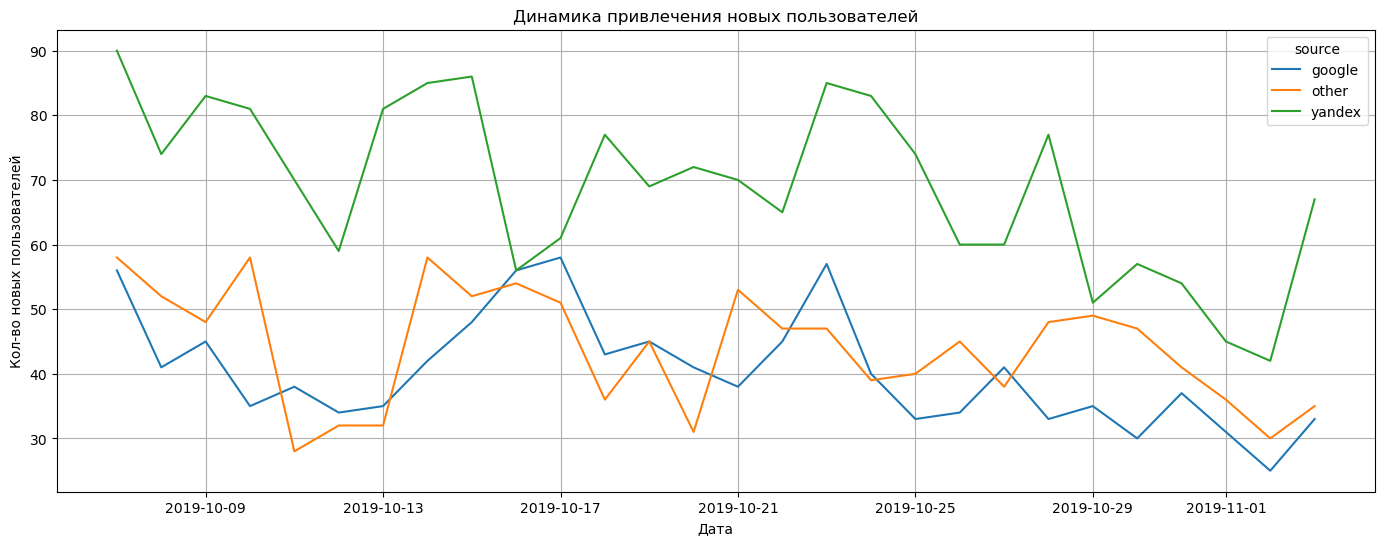

In [30]:
profiles.pivot_table(
    index='day',  # даты первых посещений
    columns='source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(17, 6), grid=True, title='Динамика привлечения новых пользователей')
plt.xlabel('Дата')
plt.ylabel('Кол-во новых пользователей')

plt.show()

На первый взгляд корреляция данных не видна. Сложно сделать вывод использовалась ли реклама для привлечения пользователей.

Подтвердим увиденное на круговой диаграмме. Источники `google` и `other` ежедневно приносят одинаковую аудиторию. Лидирует `yandex`.

Посмотрим ежедневную аудиторию новых пользователей

In [31]:
fig = px.bar(
    (
    profiles.groupby('day', as_index=False)['user_id'].count()
    ), x='day', y='user_id', title='Приток новых пользователей')
fig.update_xaxes(tickangle=45)
fig.show() 

В выходные дни новые пользователи регистрируются меньше.

### Действия пользователей

#### Первое событие

В профили пользователей мы уже добавили первое событие. Посмотри, как они распределены.

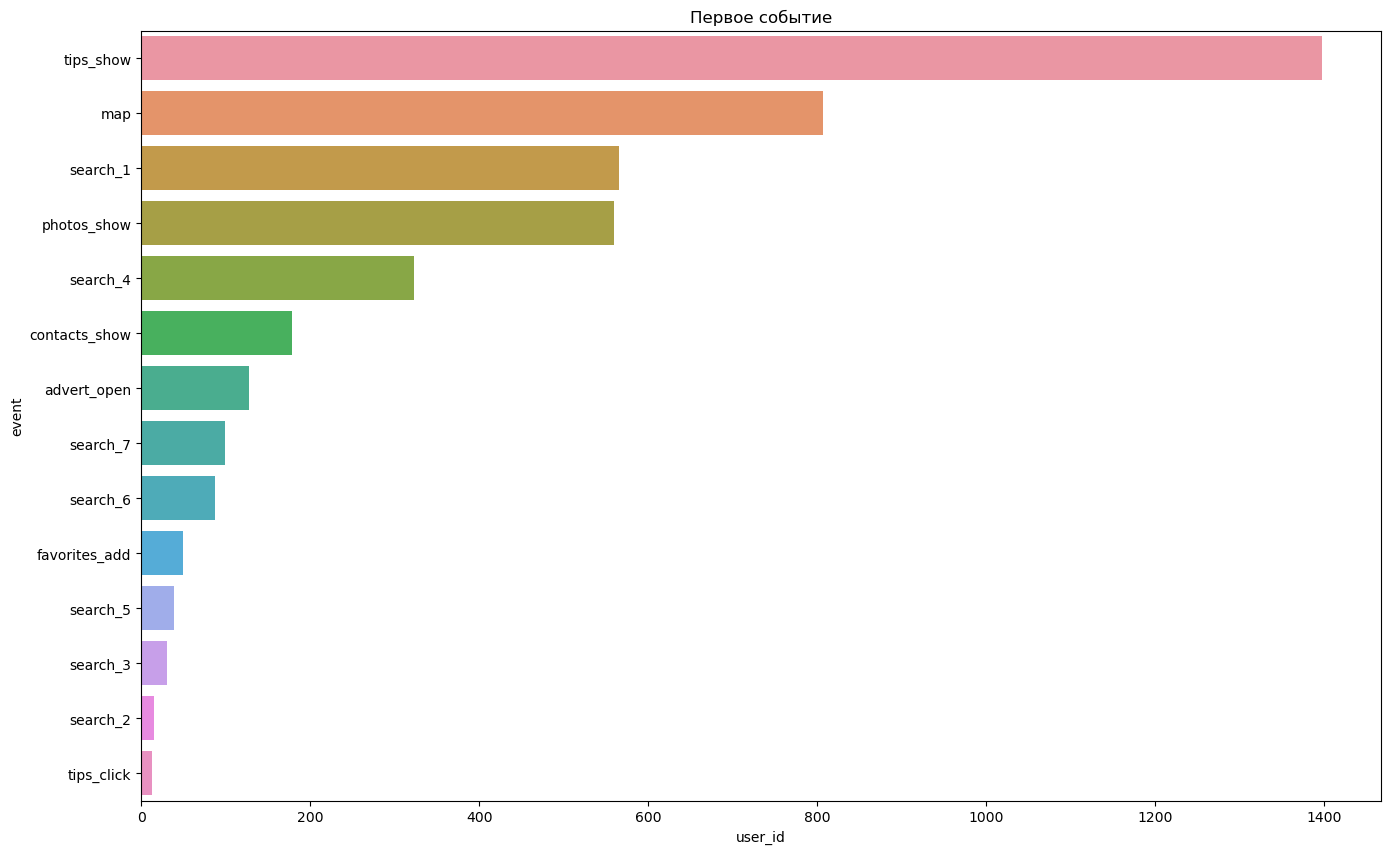

In [32]:
# средствами seaborn построим график для категориальных значений
plt.figure(figsize=(16,10))
ax = sns.barplot(x='user_id', y='event', data=
                 (
                profiles
                     .groupby('event', as_index=False)['user_id']
                     .count()
                     .sort_values('user_id', ascending=False)
)
                ) \
    .set(title='Первое событие')

ТОП_5 Первое действие пользователей:    
- 1400 раз `tips_show` — пользователь увидел рекомендованные объявления
- 800 раз `map` — пользователь открыл карту размещенных объявлений    
- 560 раз `search_1` — разные события, связанные с поиском по сайту 
- 560 раз `photos_show` — просмотр фотографий в объявлении    
- 320 раз `search_4` — разные события, связанные с поиском по сайту    

Построим тепловую карту. Она наглядно покажет плотность событий по дням.

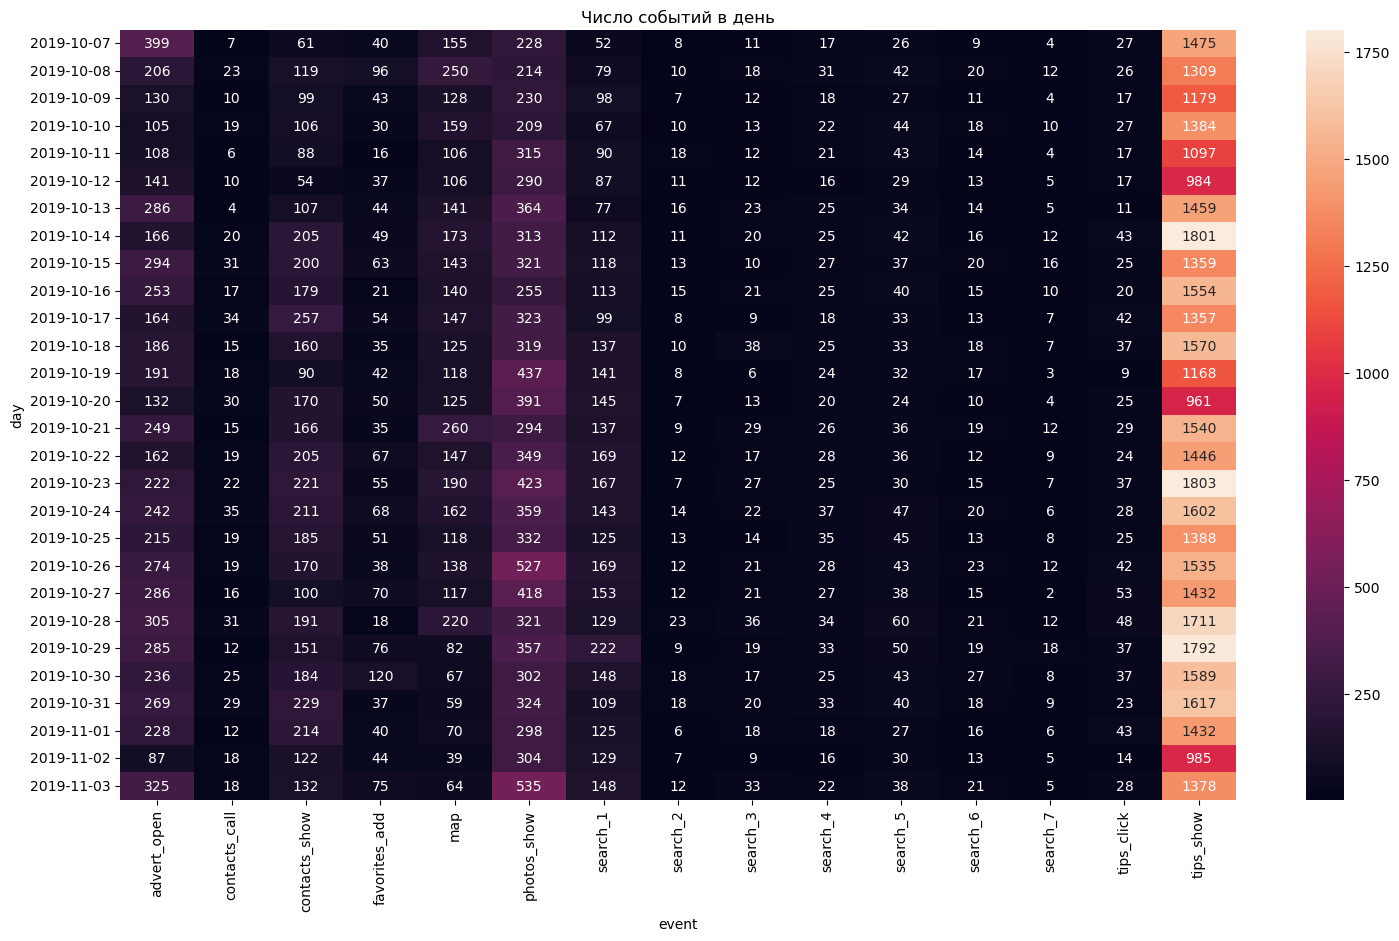

In [33]:
# добавим столбец с датой
df['day'] = df['time'].dt.date

# построим heatmap
plt.figure(figsize=(18,10)) 
plt.title('Число событий в день')
sns.heatmap(
    (
        df.pivot_table(index='day', 
                       columns='event', 
                       values='user_id', 
                       aggfunc='count')
    ), 
    annot=True, fmt='');
plt.show()

Из-за того, что `tips_show` самое популярное событие, вся тепловая карта закрашена одинаково.   
Исключим это событие и повторно построим тепловую карту.

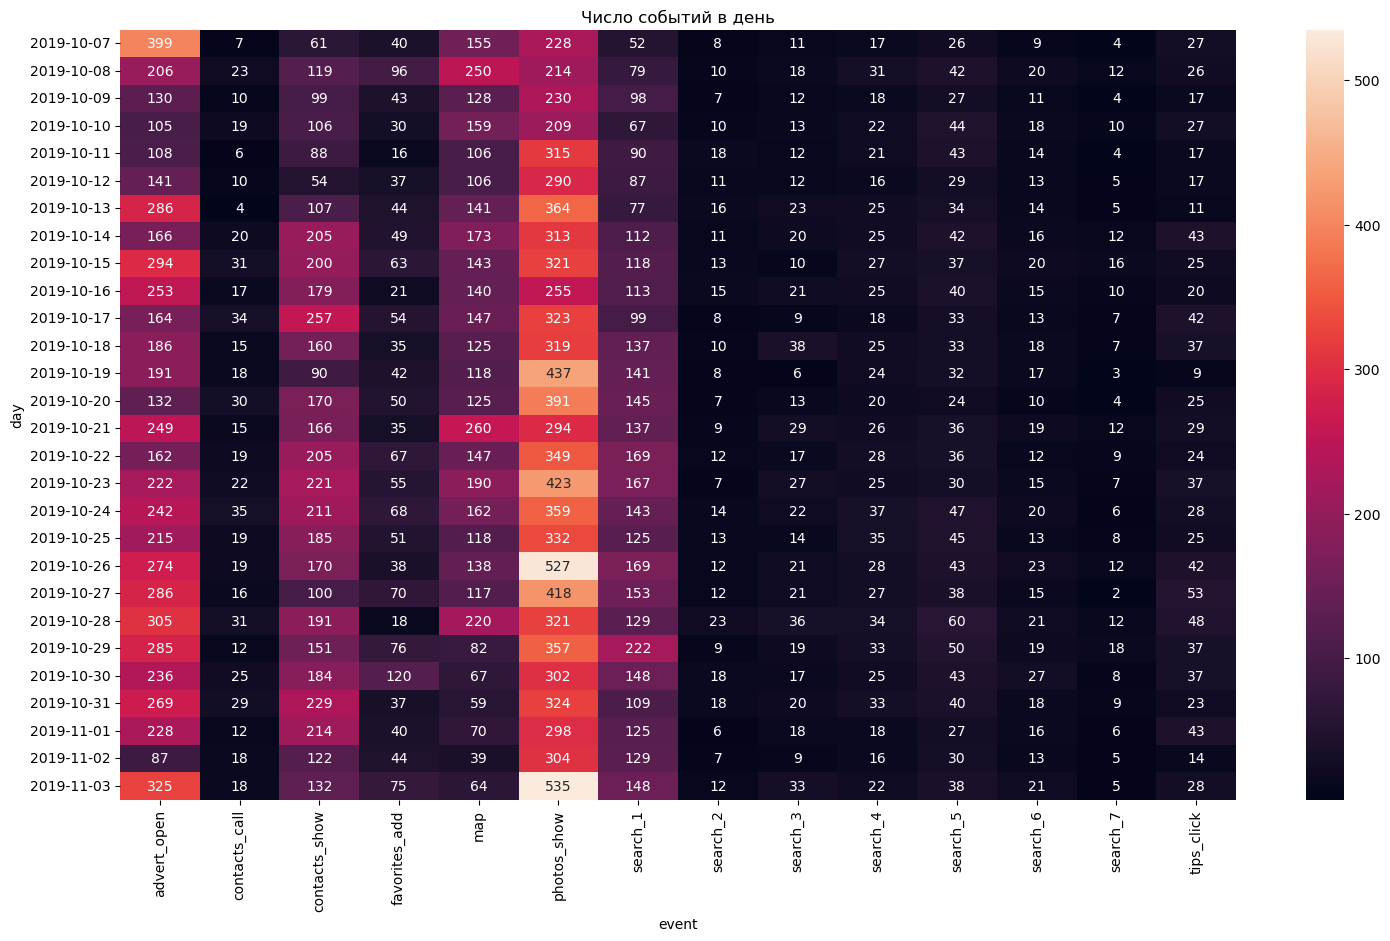

In [34]:
plt.figure(figsize=(18,10)) 
plt.title('Число событий в день')
sns.heatmap(
    (
        df.query('event != "tips_show"') \
            .pivot_table(index='day', 
                         columns='event', 
                         values='user_id', 
                         aggfunc='count')
    ), 
    annot=True, fmt='');
plt.show()

Другое дело - цветная, весёленькая!

Видно, что чаще всего пользователи смотрят фотографии в объявлении

#### Среднее количество действий на пользователя

In [35]:
# сгруппируем по пользователям, посчитаем события, найдём среднее
round(df.groupby('user_id')['event'].count().median(), 2)

9.0

In [36]:
# посмотрим квартили
df.groupby('user_id')['event'].count().describe()

count    4293.000000
mean       17.017004
std        28.597431
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max       470.000000
Name: event, dtype: float64

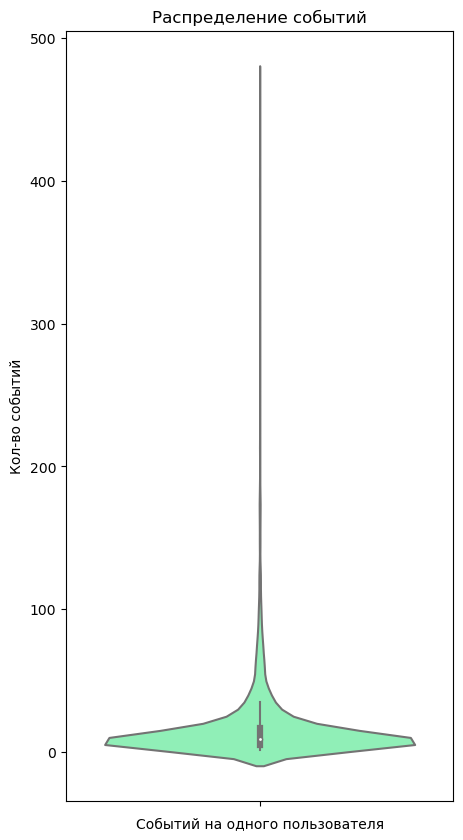

In [37]:
# с помощью seaborn построим график распределения
plt.figure(figsize=(5,10))
sns.violinplot(y='event', data=
               (
                   df.groupby('user_id', as_index=False)['event'].count()
               ), palette='rainbow') 
plt.title('Распределение событий')
plt.xlabel('Событий на одного пользователя')
plt.ylabel('Кол-во событий')
plt.show()

Очень длинный хвост. Построим столбчатую диаграмму.

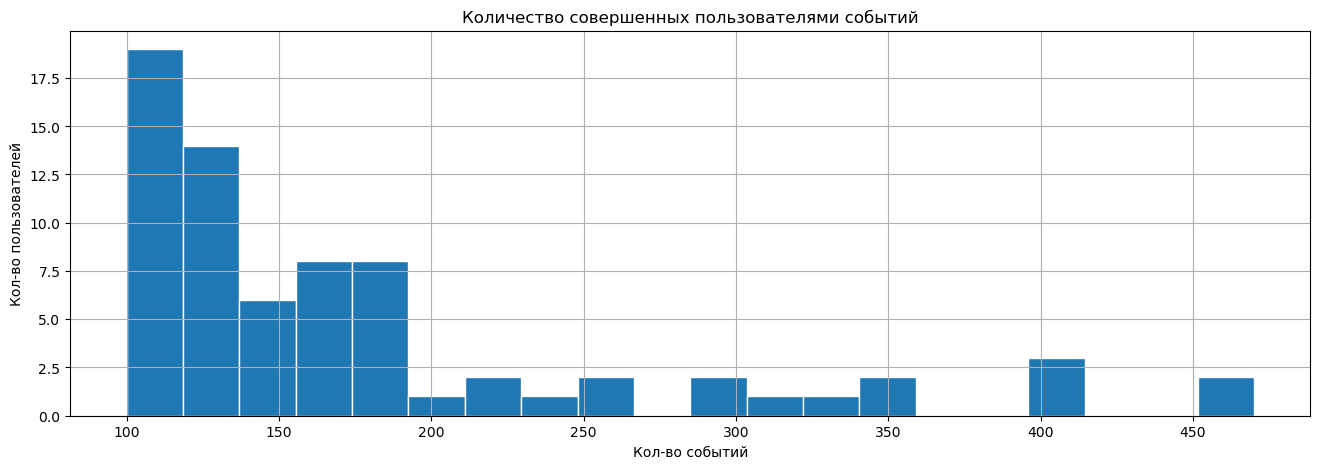

In [38]:
df.groupby('user_id', as_index=False)['event'].count().hist(
    figsize=(16,5),
    bins=20,
    ec="white",
    range=(100, 470))
plt.title('Количество совершенных пользователями событий')
plt.xlabel('Кол-во событий')
plt.ylabel('Кол-во пользователей')
plt.show();

#### Определим активных пользователей
Выведем число пользователей, совершивших более 100 событий

In [39]:
len(df.groupby('user_id', as_index=False)['event'].count().query('event > 100'))

71

Как часто активные пользователи доходят до целевого действия `contacts_show`?

In [40]:
# создадим, НАКОНЕЦ, переменную с активными пользователями
active_user = df.groupby('user_id', as_index=False)['event'] \
                .count() \
                .query('event > 100') \
                .sort_values(by='event', ascending=False) \
                .rename(columns={'event': 'number_of_events'})

# объединим с основным датофреймом
active_user = active_user.merge(
                df[['user_id', 'event']], 
                how='left', # по тевому фрейму
                on='user_id') \
    .query('event =="contacts_show"') # только целевое событие

print('Количество активных пользователей, дошедших до целевого действия =', len(active_user.user_id.unique()))

Количество активных пользователей, дошедших до целевого действия = 45


In [41]:
len(active_user.user_id.unique())

45

4293 - уникальных пользователей    
71 - активных пользователей (совершивших более 100 действий)   
45 - активных пользователя, совершивших покупку

#### Пользователи, совершившие одно действие

In [42]:
not_active_user = df.groupby('user_id', as_index=False)['event'].count().query('event == 1')
len(not_active_user)

67

Получили переменную, которая содержит `id` пользователей, которые совершили только ожно действие.    
Т.к. мы получили логи только за месяц, удалять эти данные не будем. Возможно, в последующем они совершат покупки.

#### Пользователи, совершившие покупку

In [43]:
len(df.query('event == "contacts_show"')['user_id'].unique())

981

#### Пользователей, совершивших более одной покупки

In [44]:
best_buyer = df.query('event == "contacts_show"') \
.groupby('user_id', as_index=False)['time'] \
.count() \
.rename(columns={'time': 'purchases'}) \
.sort_values(by='purchases', ascending=False) \
.query('purchases > 1')

best_buyer.describe()

purchases
count  601.000000
mean     6.648918
std     10.911838
min      2.000000
25%      2.000000
50%      4.000000
75%      7.000000
max    136.000000

601 пользователей совершили более 1-ой покупки.    
Среднее количество покупок - 6 шт.    
Самый активный пользователь - 136 покупок

### Время

#### Среднее время между первым и целевым событием

In [45]:
# создадим переменную с временем первой покупки
call_time = df.query('event == "contacts_show"') \
            .groupby('user_id', as_index=False) \
            .agg({'time': 'min'}) \
            .rename(columns={'time': 'call_ts'})

# соеденим с пользовательскими профелями
call_time = call_time.merge(
    profiles[['user_id', 'first_ts']], 
    how='left', 
    on='user_id')

# рассчитаем разницу во времени
call_time['difference_ts'] = call_time.call_ts - call_time.first_ts

# добавим колонку разницей во времени в часах
call_time['difference_hour'] = round((call_time['difference_ts'] / np.timedelta64(1, 'h')), 0)

# сконвертируем в минуты
call_time['difference_minutes'] = round((call_time['difference_ts'] / np.timedelta64(1, 'm')), 0)

# выполним сортировку
call_time.sort_values(by='difference_minutes')

user_id             call_ts  \
603  9a8f9420-40c4-4b3a-8208-ae206eca95c0 2019-10-17 22:43:06   
480  7f38ea5d-ad7c-4e8a-b1e1-c63da89a4c4c 2019-10-16 17:07:15   
474  7cc38f4c-7d5e-4dd4-a246-ef1ee2187da5 2019-10-19 15:18:30   
784  cdbb5f7e-afec-4840-8080-db7515dc8a04 2019-10-21 16:38:15   
210  331f141f-40fa-4388-8f68-056d3702c6b0 2019-11-02 07:39:43   
..                                    ...                 ...   
737  c21daf1f-e787-4a5c-9d92-62cd3dafc9b3 2019-10-25 15:38:49   
958  f9c19253-73e7-4b9e-9630-45353a792248 2019-11-03 11:39:32   
455  771c9e69-4c82-4e02-a862-d56b40a29838 2019-11-02 18:03:57   
782  cbfbc3ed-2ca7-468e-9d1e-3c321f35dcc9 2019-11-03 22:38:17   
41   08ff0fce-e12b-4f7e-8680-34e105f7f537 2019-11-03 13:34:38   

               first_ts    difference_ts  difference_hour  difference_minutes  
603 2019-10-17 22:43:06  0 days 00:00:00              0.0                 0.0  
480 2019-10-16 17:07:15  0 days 00:00:00              0.0                 0.0  
474 2019-10-19 15:18:30  0 days 00:00:00              0.0                 0.0  
784 2019-10-21 16:38:15  0 days 00:00:00              0.0                 0.0  
210 2019-11-02 07:39:43  0 days 00:00:00              0.0                 0.0  
..                  ...              ...              ...                 ...  
737 2019-10-07 14:32:55 18 days 01:05:54            433.0             25986.0  
958 2019-10-14 09:09:14 20 days 02:30:18            483.0             28950.0  
455 2019-10-11 12:25:56 22 days 05:38:01            534.0             32018.0  
782 2019-10-12 16:18:29 22 days 06:19:48            534.0             32060.0  
41  2019-10-11 09:14:00 23 days 04:20:38            556.0             33381.0  

[981 rows x 6 columns]

In [46]:
call_time.difference_minutes.describe()

count      981.000000
mean      1766.443425
std       4540.124692
min          0.000000
25%          1.000000
50%         11.000000
75%        579.000000
max      33381.000000
Name: difference_minutes, dtype: float64

Среднее время от первого события до покупки - 29.5 чаcов    
Медианное время - 11 минут

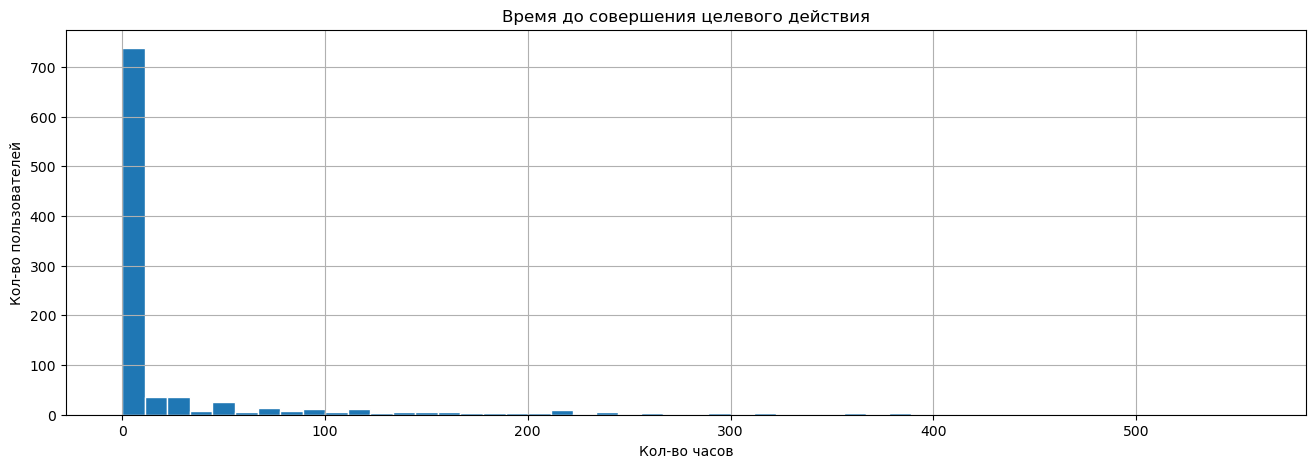

In [47]:
call_time['difference_hour'].hist(
    figsize=(16,5),
    bins=50,
    ec="white")

plt.title('Время до совершения целевого действия')
plt.xlabel('Кол-во часов')
plt.ylabel('Кол-во пользователей')
plt.show();

В основном, пользователь определяется с покупкой в течение первого часа.

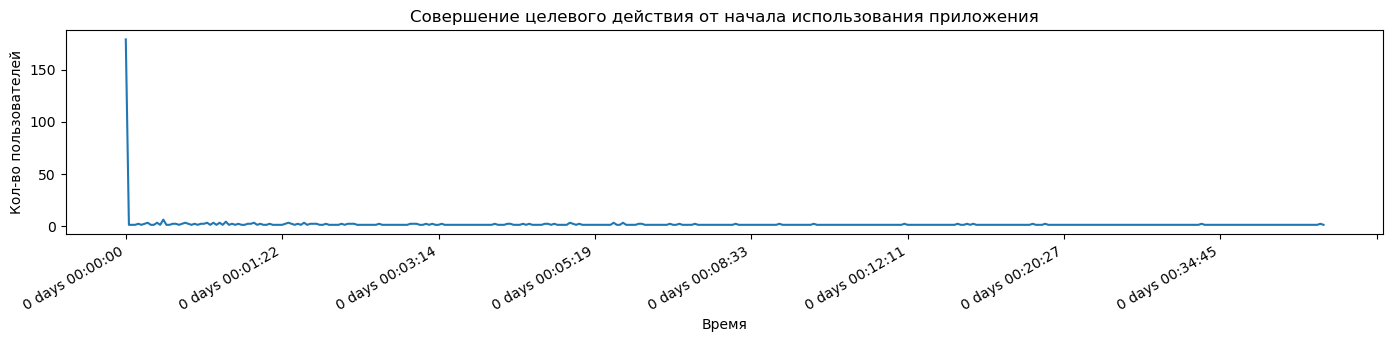

In [48]:
call_time.query('difference_minutes < 60') \
    .groupby('difference_ts')['user_id'] \
    .count() \
    .plot(figsize=(17, 3), title='Совершение целевого действия от начала использования приложения')
plt.xlabel('Время')
plt.ylabel('Кол-во пользователей')

plt.show()

15 минут нужно на совершение покупки.

Однако, у нас не полные данные. Возможно, в предыдущем месяце (данных о котором у нас нет) пользователи искали нужный товар, а купили только сейчас. Короткое время покупки может быть обманчивым. 

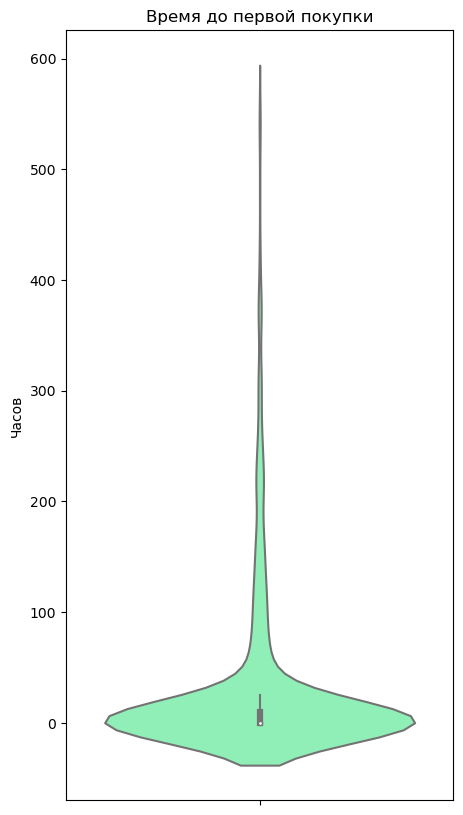

In [49]:
# с помощью seaborn построим график распределения
plt.figure(figsize=(5,10))
sns.violinplot(y='difference_hour', 
               data=call_time, 
               palette='rainbow') 
plt.title('Время до первой покупки')
plt.ylabel('Часов')
plt.show()

#### Cколько времени пользователи проводит в приложении

У нас отсутствует дата регистрации пользователя или статус "первый визит" в `event`. Предоставленный месяц событий - очень малый промежуток, чтоб сделать вывод ущел пользователь или нет.

Пасчитаем разницу во вромени между первым и послежним зафиксированным событием.

In [50]:
# создадим столбец со временем последнего события
profiles = profiles.merge(
(
    df.groupby('user_id', as_index=False) \
            .agg({'time': 'max'}) \
            .rename(columns={'time': 'last_ts'})
), 
    how='left',
    on='user_id'
)

In [51]:
# рассчитаем разницу во времени
profiles['life_time'] = (profiles.last_ts - profiles.first_ts).dt.days

In [52]:
# переведём в дни
# profiles['life_time_day'] = round((profiles['life_time'] / np.timedelta64(1, 'D')), 0)
profiles.life_time.describe()

count    4293.000000
mean        2.437223
std         5.059348
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        26.000000
Name: life_time, dtype: float64

Доля пользователей со сроком жизни в приложении меньше одного дня.

In [53]:
round(len(profiles.query('life_time < 2')) * 100 / len(profiles), 2)

73.19

**73.2%** пользователей провели в приложении меньше двух дней.

Посмотрим, как распределились оставшиеся 26%

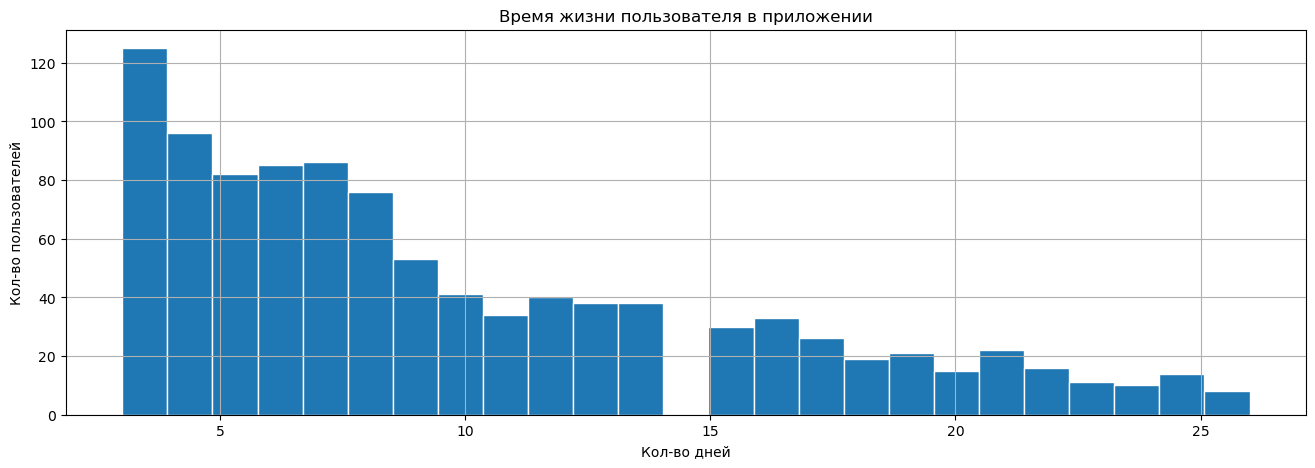

In [54]:
profiles.query('life_time > 2')['life_time'].hist(figsize=(16,5), 
                                                          bins=25, 
                                                          ec="white")

plt.title('Время жизни пользователя в приложении')
plt.xlabel('Кол-во дней')
plt.ylabel('Кол-во пользователей')
plt.show();

Виден почти линейный спад в активности пользователей.

Ежедневная, преданная аудитория - мала


In [55]:
# Рассчитаем время проведённое в приложении в минутах
profiles['minutes_in_app'] = profiles.last_ts - profiles.first_ts
profiles['minutes_in_app'] = round((profiles['minutes_in_app'] / np.timedelta64(1, 'm')), 0)

In [56]:
profiles['minutes_in_app'].describe()

count     4293.000000
mean      3794.315164
std       7479.103518
min          0.000000
25%         10.000000
50%         43.000000
75%       3844.000000
max      38685.000000
Name: minutes_in_app, dtype: float64

Долгожителей в приложении мало. Медианное значение разницы между двемя крайними событиями 43 минуты.

<hr style="border: 2px solid green;" />

## Промежуточный вывод

В нашем распоряжении события 4300 пользователей (из них 981 совершили покупку) за месяц месц.    

Есть три источника от куда приходят пользователи. Почти половина пользователей пришло через `yandex`.

Самое популярное событие - пользователь увидел рекомендованные объявления.

601 пользователей совершили более одной покупки.

Медианное время от первого действия до целевого - менее одного часа.

71% пользователей имеют срок жизни в приложении меньше 2х дней.

<hr style="border: 2px solid green;" />

## Проверка гипотез

### Определить признак разбиения пользователей на группы

Т.к. в ходе анализа датафрейма не было выявлено явных закономерностей в поведении пользователей и корреляции в данных, критерием для разбивки пользователей на категории выбирем источник трафика. В последующем наш анализ будет полезен маркетологам для формирования рекламных компаний.

Полученные в ходе исследования данные облегчат расчёт стоимости привлечения новых клиентов. Помогут понять рентабельность рекламных компаний. Руководствуясь принципом "два старых клиента лучше одного нового", определим у какого источника лучшие показатели удержания.

### Пользователи какой группы склонны часто возвращаться в мобильное приложение (retention rate)?

Вспомним теорию.

Retention Rate, или коэффициент удержания, показывает, как долго клиенты остаются с компанией. Это один из важнейших показателей «здоровья» бизнеса. 

Чтобы узнать Retention Rate, нужно разделить количество активных пользователей на текущий день на количество активных пользователей на первый день. В когортном анализе расчёт усложняется, потому что операцию нужно провести со всеми когортами.

**Как рассчитать Retention Rate в Python**

- Получить журнал сессий и профили пользователей.
- Объединить данные сессий с профилями.
- Рассчитать лайфтайм пользователя для каждой сессии.
- Построить таблицу удержания. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — количество уникальных идентификаторов пользователей.
- Вычислить размеры когорт и занести результаты в отдельную таблицу.
- Объединить таблицы размеров когорт и удержания.
- Разделить каждую «ячейку» таблицы удержания на соответствующий размер когорты.

Переменная `profiles` уже содержит часть данных.

Далее по плану — таблица удержания. Её ещё называют треугольной таблицей. 

Применим метод `pivot_table()`. Чтобы сделать даты первого посещения заголовками строк, лайфтаймы — заголовками столбцов, а количество уникальных пользователей — значениями, передадим параметру `index` значения столбца `day`, параметру `columns` — значения `life_time`, параметру `values` — значения `user_id`, а параметру `aggfunc` — функцию для подсчёта уникальных значений `nunique`. 


In [57]:
# строим таблицу удержания

result_grouped = profiles.pivot_table(
    index=['day'], columns='life_time', values='user_id', aggfunc='nunique'
)

result_grouped

life_time      0     1     2     3    4    5    6    7    8    9   ...   17  \
day                                                                ...        
2019-10-07  107.0   8.0   5.0  10.0  2.0  2.0  4.0  7.0  4.0  5.0  ...  2.0   
2019-10-08  105.0   9.0   6.0   4.0  1.0  4.0  NaN  2.0  2.0  2.0  ...  1.0   
2019-10-09  108.0   6.0   2.0   7.0  3.0  5.0  3.0  4.0  5.0  2.0  ...  2.0   
2019-10-10  107.0   5.0   4.0   2.0  5.0  4.0  2.0  3.0  2.0  2.0  ...  5.0   
2019-10-11   82.0   5.0   2.0   6.0  2.0  4.0  1.0  5.0  1.0  1.0  ...  4.0   
2019-10-12   68.0   7.0   5.0   3.0  4.0  3.0  2.0  3.0  2.0  NaN  ...  1.0   
2019-10-13   94.0   8.0   3.0   3.0  3.0  3.0  5.0  4.0  3.0  3.0  ...  NaN   
2019-10-14  109.0   8.0   7.0   7.0  4.0  3.0  2.0  2.0  5.0  4.0  ...  4.0   
2019-10-15  114.0  10.0   3.0   5.0  6.0  2.0  5.0  4.0  8.0  1.0  ...  4.0   
2019-10-16  104.0  11.0   3.0   3.0  3.0  2.0  4.0  3.0  6.0  5.0  ...  2.0   
2019-10-17  102.0   5.0   8.0   9.0  4.0  4.0  7.0  2.0  2.0  2.0  ...  1.0   
2019-10-18   98.0   6.0   4.0   8.0  2.0  4.0  2.0  3.0  4.0  1.0  ...  NaN   
2019-10-19  105.0   7.0   6.0   4.0  2.0  2.0  5.0  7.0  1.0  3.0  ...  NaN   
2019-10-20  100.0   5.0   4.0   NaN  7.0  5.0  2.0  2.0  6.0  4.0  ...  NaN   
2019-10-21  107.0   7.0   5.0   6.0  4.0  3.0  4.0  9.0  5.0  1.0  ...  NaN   
2019-10-22  108.0  10.0   3.0   1.0  2.0  3.0  3.0  2.0  5.0  2.0  ...  NaN   
2019-10-23  133.0   9.0   7.0   7.0  5.0  6.0  5.0  7.0  2.0  4.0  ...  NaN   
2019-10-24  119.0  10.0   5.0   3.0  2.0  5.0  6.0  1.0  3.0  8.0  ...  NaN   
2019-10-25  101.0   5.0   6.0   4.0  8.0  3.0  5.0  7.0  5.0  3.0  ...  NaN   
2019-10-26   95.0  11.0   4.0   4.0  8.0  3.0  6.0  3.0  5.0  NaN  ...  NaN   
2019-10-27  101.0   5.0   4.0   4.0  4.0  7.0  8.0  6.0  NaN  NaN  ...  NaN   
2019-10-28  124.0   6.0  11.0   5.0  6.0  2.0  4.0  NaN  NaN  NaN  ...  NaN   
2019-10-29   95.0  12.0   9.0  10.0  6.0  3.0  NaN  NaN  NaN  NaN  ...  NaN   
2019-10-30  104.0  13.0   7.0   7.0  3.0  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2019-10-31  113.0  10.0   6.0   3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2019-11-01  100.0   9.0   3.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2019-11-02   87.0  10.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2019-11-03  135.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

life_time    18   19   20   21   22   23   24   25   26  
day                                                      
2019-10-07  3.0  5.0  2.0  1.0  5.0  3.0  1.0  7.0  6.0  
2019-10-08  NaN  4.0  3.0  1.0  NaN  4.0  4.0  4.0  2.0  
2019-10-09  1.0  2.0  1.0  4.0  2.0  NaN  3.0  3.0  NaN  
2019-10-10  4.0  2.0  NaN  6.0  2.0  2.0  2.0  NaN  NaN  
2019-10-11  1.0  1.0  2.0  3.0  3.0  2.0  NaN  NaN  NaN  
2019-10-12  2.0  NaN  1.0  6.0  4.0  NaN  NaN  NaN  NaN  
2019-10-13  NaN  1.0  5.0  1.0  NaN  NaN  NaN  NaN  NaN  
2019-10-14  3.0  3.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-15  4.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-16  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-17  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-18  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-19  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-20  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-21  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-22  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-23  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-24  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-26  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-27  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-28  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-29  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-30  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-31  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-11-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-

Следующий шаг — вычислить размеры когорт. Сгруппируем данные по дате первого посещения из `day` и посчитаем количество уникальных пользователей в каждой когорте, применив функцию `nunique` к столбцу `user_id`. Столбец с результатами переименуем в соответствии с содержанием в `cohort_size` — размер когорты.

In [58]:
# вычисляем размеры когорт

cohort_sizes = (
    profiles.groupby('day')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

cohort_sizes

cohort_size
day                    
2019-10-07          204
2019-10-08          167
2019-10-09          176
2019-10-10          174
2019-10-11          136
2019-10-12          125
2019-10-13          148
2019-10-14          185
2019-10-15          186
2019-10-16          166
2019-10-17          170
2019-10-18          156
2019-10-19          159
2019-10-20          144
2019-10-21          161
2019-10-22          157
2019-10-23          189
2019-10-24          162
2019-10-25          147
2019-10-26          139
2019-10-27          139
2019-10-28          158
2019-10-29          135
2019-10-30          134
2019-10-31          132
2019-11-01          112
2019-11-02           97
2019-11-03          135

Финишная прямая. Объединим таблицу размеров когорт с таблицей удержания по столбцу `day` методом `merge()`. Отсутствующие значения `NaN` заменим на `0` методом `fillna()`.

In [59]:
# объединяем размеры когорт и таблицу удержания

result_grouped = cohort_sizes.merge(
    result_grouped, on='day', how='left'
).fillna(0)

result_grouped

cohort_size      0     1     2     3    4    5    6    7    8  \
day                                                                         
2019-10-07          204  107.0   8.0   5.0  10.0  2.0  2.0  4.0  7.0  4.0   
2019-10-08          167  105.0   9.0   6.0   4.0  1.0  4.0  0.0  2.0  2.0   
2019-10-09          176  108.0   6.0   2.0   7.0  3.0  5.0  3.0  4.0  5.0   
2019-10-10          174  107.0   5.0   4.0   2.0  5.0  4.0  2.0  3.0  2.0   
2019-10-11          136   82.0   5.0   2.0   6.0  2.0  4.0  1.0  5.0  1.0   
2019-10-12          125   68.0   7.0   5.0   3.0  4.0  3.0  2.0  3.0  2.0   
2019-10-13          148   94.0   8.0   3.0   3.0  3.0  3.0  5.0  4.0  3.0   
2019-10-14          185  109.0   8.0   7.0   7.0  4.0  3.0  2.0  2.0  5.0   
2019-10-15          186  114.0  10.0   3.0   5.0  6.0  2.0  5.0  4.0  8.0   
2019-10-16          166  104.0  11.0   3.0   3.0  3.0  2.0  4.0  3.0  6.0   
2019-10-17          170  102.0   5.0   8.0   9.0  4.0  4.0  7.0  2.0  2.0   
2019-10-18          156   98.0   6.0   4.0   8.0  2.0  4.0  2.0  3.0  4.0   
2019-10-19          159  105.0   7.0   6.0   4.0  2.0  2.0  5.0  7.0  1.0   
2019-10-20          144  100.0   5.0   4.0   0.0  7.0  5.0  2.0  2.0  6.0   
2019-10-21          161  107.0   7.0   5.0   6.0  4.0  3.0  4.0  9.0  5.0   
2019-10-22          157  108.0  10.0   3.0   1.0  2.0  3.0  3.0  2.0  5.0   
2019-10-23          189  133.0   9.0   7.0   7.0  5.0  6.0  5.0  7.0  2.0   
2019-10-24          162  119.0  10.0   5.0   3.0  2.0  5.0  6.0  1.0  3.0   
2019-10-25          147  101.0   5.0   6.0   4.0  8.0  3.0  5.0  7.0  5.0   
2019-10-26          139   95.0  11.0   4.0   4.0  8.0  3.0  6.0  3.0  5.0   
2019-10-27          139  101.0   5.0   4.0   4.0  4.0  7.0  8.0  6.0  0.0   
2019-10-28          158  124.0   6.0  11.0   5.0  6.0  2.0  4.0  0.0  0.0   
2019-10-29          135   95.0  12.0   9.0  10.0  6.0  3.0  0.0  0.0  0.0   
2019-10-30          134  104.0  13.0   7.0   7.0  3.0  0.0  0.0  0.0  0.0   
2019-10-31          132  113.0  10.0   6.0   3.0  0.0  0.0  0.0  0.0  0.0   
2019-11-01          112  100.0   9.0   3.0   0.0  0.0  0.0  0.0  0.0  0.0   
2019-11-02           97   87.0  10.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
2019-11-03          135  135.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   

            ...   17   18   19   20   21   22   23   24   25   26  
day         ...                                                    
2019-10-07  ...  2.0  3.0  5.0  2.0  1.0  5.0  3.0  1.0  7.0  6.0  
2019-10-08  ...  1.0  0.0  4.0  3.0  1.0  0.0  4.0  4.0  4.0  2.0  
2019-10-09  ...  2.0  1.0  2.0  1.0  4.0  2.0  0.0  3.0  3.0  0.0  
2019-10-10  ...  5.0  4.0  2.0  0.0  6.0  2.0  2.0  2.0  0.0  0.0  
2019-10-11  ...  4.0  1.0  1.0  2.0  3.0  3.0  2.0  0.0  0.0  0.0  
2019-10-12  ...  1.0  2.0  0.0  1.0  6.0  4.0  0.0  0.0  0.0  0.0  
2019-10-13  ...  0.0  0.0  1.0  5.0  1.0  0.0  0.0  0.0  0.0  0.0  
2019-10-14  ...  4.0  3.0  3.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-15  ...  4.0  4.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-16  ...  2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-17  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-18  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-19  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-20  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-21  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-22  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-23  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-24  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-25  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-26  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-27  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-28  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-29  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2

Наконец, рассчитаем коэффициенты удержания. Для этого вызовем функцию `div()`, выполняющую деление. Передадим ей столбец `cohort_size` в качестве делителя и параметр `axis`, равный нулю, чтобы деление выполнялось построчно.

In [60]:
# делим данные таблицы удержания на размеры когорт

result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped

0         1         2         3         4         5   \
day                                                                      
2019-10-07  0.524510  0.039216  0.024510  0.049020  0.009804  0.009804   
2019-10-08  0.628743  0.053892  0.035928  0.023952  0.005988  0.023952   
2019-10-09  0.613636  0.034091  0.011364  0.039773  0.017045  0.028409   
2019-10-10  0.614943  0.028736  0.022989  0.011494  0.028736  0.022989   
2019-10-11  0.602941  0.036765  0.014706  0.044118  0.014706  0.029412   
2019-10-12  0.544000  0.056000  0.040000  0.024000  0.032000  0.024000   
2019-10-13  0.635135  0.054054  0.020270  0.020270  0.020270  0.020270   
2019-10-14  0.589189  0.043243  0.037838  0.037838  0.021622  0.016216   
2019-10-15  0.612903  0.053763  0.016129  0.026882  0.032258  0.010753   
2019-10-16  0.626506  0.066265  0.018072  0.018072  0.018072  0.012048   
2019-10-17  0.600000  0.029412  0.047059  0.052941  0.023529  0.023529   
2019-10-18  0.628205  0.038462  0.025641  0.051282  0.012821  0.025641   
2019-10-19  0.660377  0.044025  0.037736  0.025157  0.012579  0.012579   
2019-10-20  0.694444  0.034722  0.027778  0.000000  0.048611  0.034722   
2019-10-21  0.664596  0.043478  0.031056  0.037267  0.024845  0.018634   
2019-10-22  0.687898  0.063694  0.019108  0.006369  0.012739  0.019108   
2019-10-23  0.703704  0.047619  0.037037  0.037037  0.026455  0.031746   
2019-10-24  0.734568  0.061728  0.030864  0.018519  0.012346  0.030864   
2019-10-25  0.687075  0.034014  0.040816  0.027211  0.054422  0.020408   
2019-10-26  0.683453  0.079137  0.028777  0.028777  0.057554  0.021583   
2019-10-27  0.726619  0.035971  0.028777  0.028777  0.028777  0.050360   
2019-10-28  0.784810  0.037975  0.069620  0.031646  0.037975  0.012658   
2019-10-29  0.703704  0.088889  0.066667  0.074074  0.044444  0.022222   
2019-10-30  0.776119  0.097015  0.052239  0.052239  0.022388  0.000000   
2019-10-31  0.856061  0.075758  0.045455  0.022727  0.000000  0.000000   
2019-11-01  0.892857  0.080357  0.026786  0.000000  0.000000  0.000000   
2019-11-02  0.896907  0.103093  0.000000  0.000000  0.000000  0.000000   
2019-11-03  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  6         7         8         9   ...        17        18  \
day                                                 ...                       
2019-10-07  0.019608  0.034314  0.019608  0.024510  ...  0.009804  0.014706   
2019-10-08  0.000000  0.011976  0.011976  0.011976  ...  0.005988  0.000000   
2019-10-09  0.017045  0.022727  0.028409  0.011364  ...  0.011364  0.005682   
2019-10-10  0.011494  0.017241  0.011494  0.011494  ...  0.028736  0.022989   
2019-10-11  0.007353  0.036765  0.007353  0.007353  ...  0.029412  0.007353   
2019-10-12  0.016000  0.024000  0.016000  0.000000  ...  0.008000  0.016000   
2019-10-13  0.033784  0.027027  0.020270  0.020270  ...  0.000000  0.000000   
2019-10-14  0.010811  0.010811  0.027027  0.021622  ...  0.021622  0.016216   
2019-10-15  0.026882  0.021505  0.043011  0.005376  ...  0.021505  0.021505   
2019-10-16  0.024096  0.018072  0.036145  0.030120  ...  0.012048  0.006024   
2019-10-17  0.041176  0.011765  0.011765  0.011765  ...  0.005882  0.000000   
2019-10-18  0.012821  0.019231  0.025641  0.006410  ...  0.000000  0.000000   
2019-10-19  0.031447  0.044025  0.006289  0.018868  ...  0.000000  0.000000   
2019-10-20  0.013889  0.013889  0.041667  0.027778  ...  0.000000  0.000000   
2019-10-21  0.024845  0.055901  0.031056  0.006211  ...  0.000000  0.000000   
2019-10-22  0.019108  0.012739  0.031847  0.012739  ...  0.000000  0.000000   
2019-10-23  0.026455  0.037037  0.010582  0.021164  ...  0.000000  0.000000   
2019-10-24  0.037037  0.006173  0.018519  0.049383  ...  0.000000  0.000000   
2019-10-25  0.034014  0.047619  0.034014  0.020408  ...  0.000000  0.000000   
2019-10-26  0.043165  0.021583  0.035971  0.000000  ...  0.000000  0.000000   
2019-10-27  0.057554  0.043165  0.000000  0.000000  ...  0.

Для каждого источника трафика построим таблицу ужердания за первые десять дней (до 2019-10-17). Горизонт анализа данных установим 7 дней.

In [61]:
# source == "yandex"
# строим таблицу удержания
result_grouped_yandex = profiles.query('(source == "yandex") and (life_time < 8)').pivot_table(
    index=['day'], columns='life_time', values='user_id', aggfunc='nunique'
).head(10)


# вычисляем размеры когорт
cohort_sizes_yandex = (
    profiles.query('(source == "yandex") and (life_time < 8)')
    .groupby('day')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
).head(10)

# объединяем размеры когорт и таблицу удержания
result_grouped_yandex = cohort_sizes_yandex.merge(
    result_grouped_yandex, on='day', how='left'
).fillna(0)

# делим данные таблицы удержания на размеры когорт
result_grouped_yandex = result_grouped_yandex.div(
    result_grouped_yandex['cohort_size'], axis=0
).drop(columns=['cohort_size'])

In [62]:
# source == "google"
# строим таблицу удержания
result_grouped_google = profiles.query('(source == "google") and (life_time < 8)').pivot_table(
    index=['day'], columns='life_time', values='user_id', aggfunc='nunique'
).head(10)


# вычисляем размеры когорт
cohort_sizes_google = (
    profiles.query('(source == "google") and (life_time < 8)')
    .groupby('day')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
).head(10)

# объединяем размеры когорт и таблицу удержания
result_grouped_google = cohort_sizes_google.merge(
    result_grouped_google, on='day', how='left'
).fillna(0)

# делим данные таблицы удержания на размеры когорт
result_grouped_google = result_grouped_google.div(
    result_grouped_google['cohort_size'], axis=0
).drop(columns=['cohort_size'])

In [63]:
# source == "other"
# строим таблицу удержания
result_grouped_other = profiles.query('(source == "other") and (life_time < 8)').pivot_table(
    index=['day'], columns='life_time', values='user_id', aggfunc='nunique'
).head(10)


# вычисляем размеры когорт
cohort_sizes_other = (
    profiles.query('(source == "other") and (life_time < 8)')
    .groupby('day')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
).head(10)

# объединяем размеры когорт и таблицу удержания
result_grouped_other = cohort_sizes_other.merge(
    result_grouped_other, on='day', how='left'
).fillna(0)

# делим данные таблицы удержания на размеры когорт
result_grouped_other = result_grouped_other.div(
    result_grouped_other['cohort_size'], axis=0
).drop(columns=['cohort_size'])

In [64]:
print('retention rate для yandex')
display(result_grouped_yandex)
print()
print('retention rate для google')
display(result_grouped_google)
print()
print('retention rate для other')
display(result_grouped_other)

retention rate для yandex


0         1         2         3         4         5  \
day                                                                      
2019-10-07  0.709677  0.064516  0.032258  0.080645  0.016129  0.032258   
2019-10-08  0.842105  0.052632  0.035088  0.017544  0.017544  0.000000   
2019-10-09  0.779412  0.058824  0.029412  0.044118  0.014706  0.044118   
2019-10-10  0.812500  0.031250  0.031250  0.000000  0.062500  0.031250   
2019-10-11  0.722222  0.092593  0.037037  0.000000  0.018519  0.074074   
2019-10-12  0.695652  0.108696  0.021739  0.021739  0.043478  0.043478   
2019-10-13  0.753846  0.061538  0.000000  0.030769  0.046154  0.046154   
2019-10-14  0.760563  0.042254  0.070423  0.056338  0.042254  0.000000   
2019-10-15  0.769231  0.076923  0.000000  0.030769  0.030769  0.015385   
2019-10-16  0.761905  0.047619  0.023810  0.023810  0.071429  0.000000   

                   6         7  
day                             
2019-10-07  0.016129  0.048387  
2019-10-08  0.000000  0.035088  
2019-10-09  0.000000  0.029412  
2019-10-10  0.015625  0.015625  
2019-10-11  0.018519  0.037037  
2019-10-12  0.021739  0.043478  
2019-10-13  0.015385  0.046154  
2019-10-14  0.014085  0.014085  
2019-10-15  0.046154  0.030769  
2019-10-16  0.047619  0.023810


retention rate для google


0         1         2         3         4         5  \
day                                                                      
2019-10-07  0.720930  0.046512  0.023256  0.093023  0.000000  0.000000   
2019-10-08  0.741935  0.129032  0.096774  0.032258  0.000000  0.000000   
2019-10-09  0.756757  0.054054  0.000000  0.081081  0.027027  0.027027   
2019-10-10  0.846154  0.038462  0.038462  0.000000  0.000000  0.000000   
2019-10-11  0.838710  0.000000  0.000000  0.064516  0.000000  0.000000   
2019-10-12  0.730769  0.000000  0.076923  0.076923  0.038462  0.000000   
2019-10-13  0.806452  0.096774  0.064516  0.000000  0.000000  0.000000   
2019-10-14  0.766667  0.066667  0.033333  0.033333  0.033333  0.033333   
2019-10-15  0.697674  0.069767  0.023256  0.046512  0.093023  0.000000   
2019-10-16  0.755102  0.122449  0.020408  0.020408  0.000000  0.000000   

                   6         7  
day                             
2019-10-07  0.046512  0.069767  
2019-10-08  0.000000  0.000000  
2019-10-09  0.054054  0.000000  
2019-10-10  0.038462  0.038462  
2019-10-11  0.000000  0.096774  
2019-10-12  0.038462  0.038462  
2019-10-13  0.032258  0.000000  
2019-10-14  0.033333  0.000000  
2019-10-15  0.046512  0.023256  
2019-10-16  0.040816  0.040816


retention rate для other


0         1         2         3         4         5  \
day                                                                      
2019-10-07  0.800000  0.050000  0.050000  0.025000  0.025000  0.000000   
2019-10-08  0.790698  0.046512  0.023256  0.046512  0.000000  0.093023   
2019-10-09  0.818182  0.000000  0.000000  0.030303  0.030303  0.030303   
2019-10-10  0.785714  0.047619  0.023810  0.047619  0.023810  0.047619   
2019-10-11  0.772727  0.000000  0.000000  0.181818  0.045455  0.000000   
2019-10-12  0.739130  0.086957  0.086957  0.000000  0.043478  0.043478   
2019-10-13  0.740741  0.037037  0.037037  0.037037  0.000000  0.000000   
2019-10-14  0.780488  0.073171  0.024390  0.048780  0.000000  0.048780   
2019-10-15  0.829268  0.048780  0.048780  0.024390  0.000000  0.024390   
2019-10-16  0.833333  0.071429  0.023810  0.023810  0.000000  0.047619   

                   6         7  
day                             
2019-10-07  0.025000  0.025000  
2019-10-08  0.000000  0.000000  
2019-10-09  0.030303  0.060606  
2019-10-10  0.000000  0.023810  
2019-10-11  0.000000  0.000000  
2019-10-12  0.000000  0.000000  
2019-10-13  0.111111  0.037037  
2019-10-14  0.000000  0.024390  
2019-10-15  0.000000  0.024390  
2019-10-16  0.000000  0.000000

Источник `google` и `other` приводят меньше пользователей чем `yandex`. В таблице удержания у них больше нулей - это дни, когда не привели ни одного пользователя. Однако, визуально нет отличий в показателях удержания пользователй среди источников.

Округлим значения и построим тепловую карту.

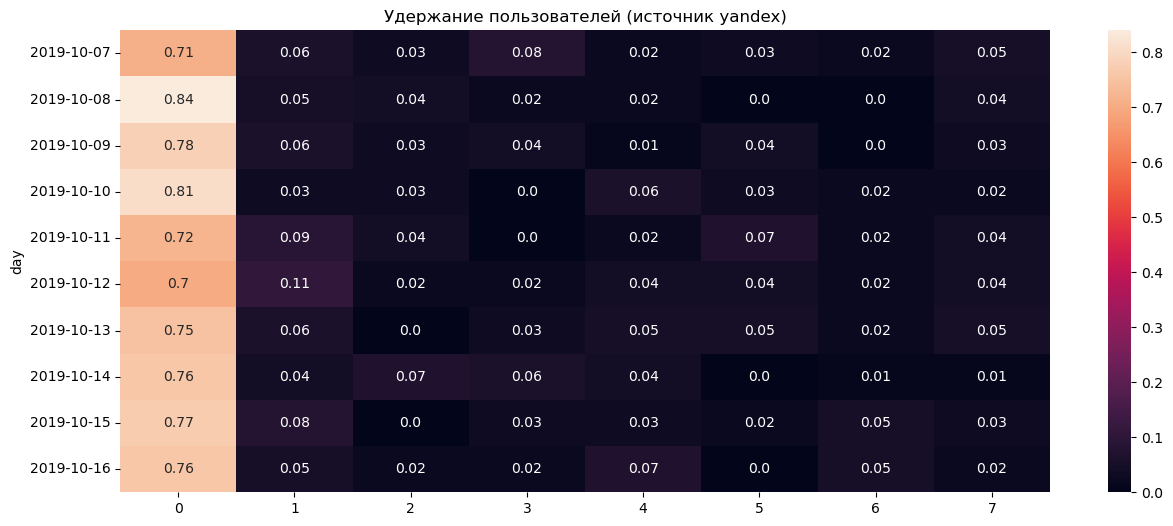

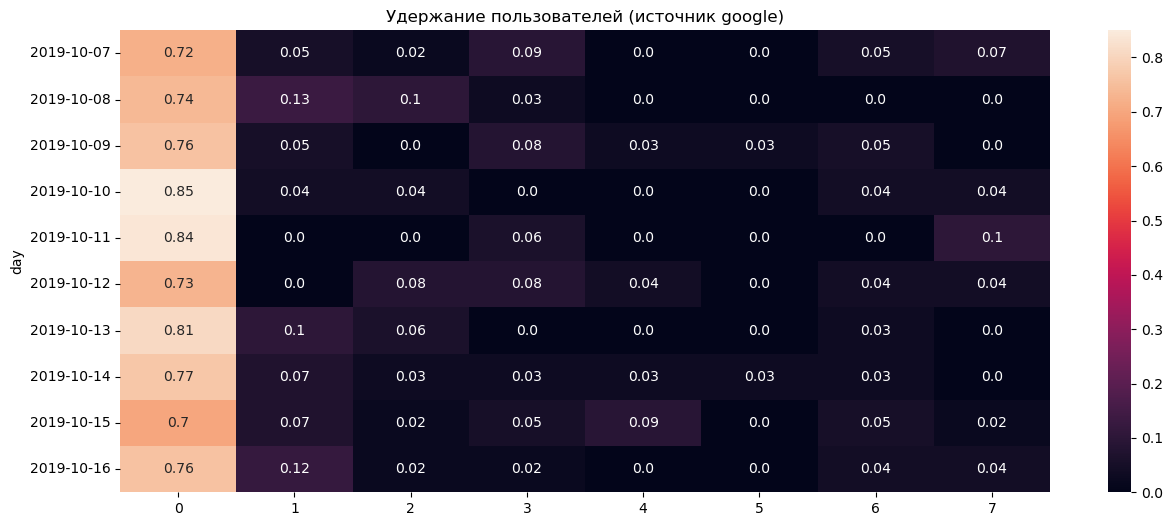

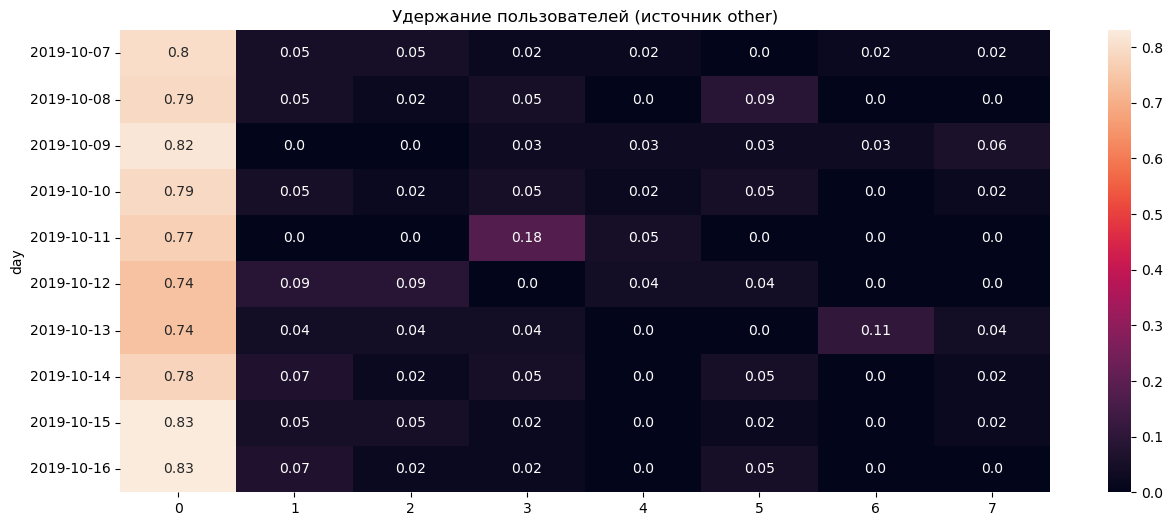

In [65]:
# построим heatmap для yandex
plt.figure(figsize=(15,6)) 
plt.title('Удержание пользователей (источник yandex)')
sns.heatmap(result_grouped_yandex.round({0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2}), 
            annot=True, 
            fmt='');
plt.show()

# построим heatmap для google
plt.figure(figsize=(15,6)) 
plt.title('Удержание пользователей (источник google)')
sns.heatmap(result_grouped_google.round({0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2}), 
            annot=True, 
            fmt='');
plt.show()

# построим heatmap для other
plt.figure(figsize=(15,6)) 
plt.title('Удержание пользователей (источник other)')
sns.heatmap(result_grouped_other.round({0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2}), 
            annot=True, 
            fmt='');
plt.show()

На конец недели у источников `google` и `other` показатель удержания клиентов лучше чем у `yandex`.

### Конверсия в целевое действие

Рассчитаем конверсию пользователей

![Изображение](https://github.com/vs-gorgan/practicum.yandex/blob/main/13_mobile_app/conversion_rate.png)

Порядок расчёта Conversion Rate:

-    Получить пользовательские профили и данные о покупках.
-    Найти дату и время первой покупки для каждого пользователя.
-    Добавить данные о покупках в профили.
-    Рассчитать лайфтайм пользователя для каждой покупки.
-    Построить таблицу конверсии. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — количество уникальных идентификаторов пользователей.
-    Посчитать сумму с накоплением для каждой строки таблицы конверсии.
-    Вычислить размеры когорт и занести результаты в отдельную таблицу.
-    Объединить таблицы размеров когорт и конверсии.
-    Разделить каждую «ячейку» таблицы конверсии на соответствующий размер когорты.

In [66]:
# к основному датафрейму добавим колонку с датой первого дня активности пользователя
df = df.merge(profiles[['life_time', 'day', 'user_id']], how='left', on='user_id') \
    .rename(columns={'day_x': 'date', 'day_y': 'day'})

In [67]:
# строим таблицу конверсии

conversion_rate = df.query('event == "contacts_show"').pivot_table(
    index=['day'], columns='life_time', values='user_id', aggfunc='nunique'
)

conversion_rate

life_time     0    1    2    3    4    5    6    7    8    9   ...   17   18  \
day                                                            ...             
2019-10-07  23.0  2.0  1.0  2.0  1.0  1.0  1.0  2.0  NaN  NaN  ...  1.0  2.0   
2019-10-08  18.0  3.0  2.0  2.0  NaN  NaN  NaN  1.0  NaN  2.0  ...  1.0  NaN   
2019-10-09  26.0  3.0  NaN  1.0  1.0  3.0  NaN  1.0  3.0  1.0  ...  NaN  1.0   
2019-10-10  19.0  NaN  2.0  2.0  1.0  1.0  1.0  1.0  NaN  NaN  ...  1.0  NaN   
2019-10-11  14.0  NaN  NaN  NaN  NaN  1.0  1.0  3.0  NaN  NaN  ...  NaN  NaN   
2019-10-12  10.0  2.0  1.0  1.0  2.0  1.0  2.0  NaN  NaN  NaN  ...  1.0  NaN   
2019-10-13  14.0  4.0  NaN  NaN  2.0  NaN  4.0  1.0  1.0  NaN  ...  NaN  NaN   
2019-10-14  17.0  3.0  2.0  3.0  NaN  1.0  1.0  NaN  NaN  3.0  ...  1.0  1.0   
2019-10-15  16.0  4.0  1.0  1.0  2.0  2.0  1.0  NaN  2.0  NaN  ...  1.0  NaN   
2019-10-16  11.0  4.0  1.0  1.0  NaN  NaN  2.0  1.0  NaN  NaN  ...  NaN  1.0   
2019-10-17  16.0  5.0  4.0  7.0  2.0  NaN  2.0  NaN  NaN  1.0  ...  1.0  NaN   
2019-10-18  19.0  4.0  2.0  3.0  1.0  2.0  1.0  1.0  2.0  NaN  ...  NaN  NaN   
2019-10-19  18.0  1.0  4.0  1.0  NaN  1.0  1.0  2.0  NaN  1.0  ...  NaN  NaN   
2019-10-20  20.0  NaN  2.0  NaN  1.0  2.0  1.0  NaN  1.0  2.0  ...  NaN  NaN   
2019-10-21  16.0  3.0  2.0  2.0  1.0  NaN  2.0  NaN  2.0  1.0  ...  NaN  NaN   
2019-10-22  23.0  2.0  1.0  NaN  NaN  1.0  2.0  1.0  3.0  NaN  ...  NaN  NaN   
2019-10-23  21.0  4.0  3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  NaN  NaN   
2019-10-24  27.0  5.0  1.0  1.0  2.0  1.0  2.0  NaN  2.0  7.0  ...  NaN  NaN   
2019-10-25  18.0  2.0  3.0  1.0  3.0  1.0  4.0  3.0  1.0  3.0  ...  NaN  NaN   
2019-10-26  17.0  6.0  3.0  2.0  NaN  NaN  4.0  NaN  3.0  NaN  ...  NaN  NaN   
2019-10-27  16.0  1.0  3.0  1.0  2.0  3.0  3.0  NaN  NaN  NaN  ...  NaN  NaN   
2019-10-28  18.0  1.0  3.0  3.0  3.0  NaN  2.0  NaN  NaN  NaN  ...  NaN  NaN   
2019-10-29  12.0  2.0  3.0  4.0  3.0  1.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2019-10-30  15.0  6.0  5.0  3.0  1.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2019-10-31  17.0  5.0  3.0  2.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2019-11-01  21.0  4.0  2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2019-11-02  20.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2019-11-03  26.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

life_time    19   20   21   22   23   24   25   26  
day                                                 
2019-10-07  NaN  2.0  1.0  1.0  NaN  NaN  4.0  3.0  
2019-10-08  NaN  NaN  1.0  NaN  2.0  2.0  1.0  NaN  
2019-10-09  1.0  NaN  NaN  1.0  NaN  1.0  1.0  NaN  
2019-10-10  1.0  NaN  4.0  NaN  2.0  1.0  NaN  NaN  
2019-10-11  1.0  1.0  2.0  2.0  1.0  NaN  NaN  NaN  
2019-10-12  NaN  NaN  1.0  2.0  NaN  NaN  NaN  NaN  
2019-10-13  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-14  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-15  2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-16  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-17  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-18  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-19  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-20  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-21  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-22  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-23  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-24  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-26  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-27  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-28  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-29  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-30  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-31  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-11-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-11-02  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-11-03  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[28 rows

In [68]:
# Посчитаем сумму с накоплением для каждой строки
conversion_rate = conversion_rate.fillna(0).cumsum(axis = 1)
conversion_rate

life_time     0     1     2     3     4     5     6     7     8     9   ...  \
day                                                                     ...   
2019-10-07  23.0  25.0  26.0  28.0  29.0  30.0  31.0  33.0  33.0  33.0  ...   
2019-10-08  18.0  21.0  23.0  25.0  25.0  25.0  25.0  26.0  26.0  28.0  ...   
2019-10-09  26.0  29.0  29.0  30.0  31.0  34.0  34.0  35.0  38.0  39.0  ...   
2019-10-10  19.0  19.0  21.0  23.0  24.0  25.0  26.0  27.0  27.0  27.0  ...   
2019-10-11  14.0  14.0  14.0  14.0  14.0  15.0  16.0  19.0  19.0  19.0  ...   
2019-10-12  10.0  12.0  13.0  14.0  16.0  17.0  19.0  19.0  19.0  19.0  ...   
2019-10-13  14.0  18.0  18.0  18.0  20.0  20.0  24.0  25.0  26.0  26.0  ...   
2019-10-14  17.0  20.0  22.0  25.0  25.0  26.0  27.0  27.0  27.0  30.0  ...   
2019-10-15  16.0  20.0  21.0  22.0  24.0  26.0  27.0  27.0  29.0  29.0  ...   
2019-10-16  11.0  15.0  16.0  17.0  17.0  17.0  19.0  20.0  20.0  20.0  ...   
2019-10-17  16.0  21.0  25.0  32.0  34.0  34.0  36.0  36.0  36.0  37.0  ...   
2019-10-18  19.0  23.0  25.0  28.0  29.0  31.0  32.0  33.0  35.0  35.0  ...   
2019-10-19  18.0  19.0  23.0  24.0  24.0  25.0  26.0  28.0  28.0  29.0  ...   
2019-10-20  20.0  20.0  22.0  22.0  23.0  25.0  26.0  26.0  27.0  29.0  ...   
2019-10-21  16.0  19.0  21.0  23.0  24.0  24.0  26.0  26.0  28.0  29.0  ...   
2019-10-22  23.0  25.0  26.0  26.0  26.0  27.0  29.0  30.0  33.0  33.0  ...   
2019-10-23  21.0  25.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0  35.0  ...   
2019-10-24  27.0  32.0  33.0  34.0  36.0  37.0  39.0  39.0  41.0  48.0  ...   
2019-10-25  18.0  20.0  23.0  24.0  27.0  28.0  32.0  35.0  36.0  39.0  ...   
2019-10-26  17.0  23.0  26.0  28.0  28.0  28.0  32.0  32.0  35.0  35.0  ...   
2019-10-27  16.0  17.0  20.0  21.0  23.0  26.0  29.0  29.0  29.0  29.0  ...   
2019-10-28  18.0  19.0  22.0  25.0  28.0  28.0  30.0  30.0  30.0  30.0  ...   
2019-10-29  12.0  14.0  17.0  21.0  24.0  25.0  25.0  25.0  25.0  25.0  ...   
2019-10-30  15.0  21.0  26.0  29.0  30.0  30.0  30.0  30.0  30.0  30.0  ...   
2019-10-31  17.0  22.0  25.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2019-11-01  21.0  25.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2019-11-02  20.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  ...   
2019-11-03  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  ...   

life_time     17    18    19    20    21    22    23    24    25    26  
day                                                                     
2019-10-07  38.0  40.0  40.0  42.0  43.0  44.0  44.0  44.0  48.0  51.0  
2019-10-08  33.0  33.0  33.0  33.0  34.0  34.0  36.0  38.0  39.0  39.0  
2019-10-09  45.0  46.0  47.0  47.0  47.0  48.0  48.0  49.0  50.0  50.0  
2019-10-10  33.0  33.0  34.0  34.0  38.0  38.0  40.0  41.0  41.0  41.0  
2019-10-11  23.0  23.0  24.0  25.0  27.0  29.0  30.0  30.0  30.0  30.0  
2019-10-12  27.0  27.0  27.0  27.0  28.0  30.0  30.0  30.0  30.0  30.0  
2019-10-13  30.0  30.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  
2019-10-14  35.0  36.0  36.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  
2019-10-15  32.0  32.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  
2019-10-16  29.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  
2019-10-17  46.0  46.0  46.0  46.0  46.0  46.0  46.0  46.0  46.0  46.0  
2019-10-18  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  
2019-10-19  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  
2019-10-20  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  
2019-10-21  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  
2019-10-22  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  
2019-10-23  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  
2019-10-24  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  
2019-10-25  39.0  39.0  39.0  39.0  39.0  39.0  39.0  39.0  39.0  39.0  
2019-10-26  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  
2019-10-27  29.0  29.0 

In [69]:
# объединяем размеры когорт и таблицу удержания
conversion_rate = cohort_sizes.merge(
    conversion_rate, on='day', how='left'
).fillna(0)

conversion_rate

cohort_size     0     1     2     3     4     5     6     7     8  \
day                                                                             
2019-10-07          204  23.0  25.0  26.0  28.0  29.0  30.0  31.0  33.0  33.0   
2019-10-08          167  18.0  21.0  23.0  25.0  25.0  25.0  25.0  26.0  26.0   
2019-10-09          176  26.0  29.0  29.0  30.0  31.0  34.0  34.0  35.0  38.0   
2019-10-10          174  19.0  19.0  21.0  23.0  24.0  25.0  26.0  27.0  27.0   
2019-10-11          136  14.0  14.0  14.0  14.0  14.0  15.0  16.0  19.0  19.0   
2019-10-12          125  10.0  12.0  13.0  14.0  16.0  17.0  19.0  19.0  19.0   
2019-10-13          148  14.0  18.0  18.0  18.0  20.0  20.0  24.0  25.0  26.0   
2019-10-14          185  17.0  20.0  22.0  25.0  25.0  26.0  27.0  27.0  27.0   
2019-10-15          186  16.0  20.0  21.0  22.0  24.0  26.0  27.0  27.0  29.0   
2019-10-16          166  11.0  15.0  16.0  17.0  17.0  17.0  19.0  20.0  20.0   
2019-10-17          170  16.0  21.0  25.0  32.0  34.0  34.0  36.0  36.0  36.0   
2019-10-18          156  19.0  23.0  25.0  28.0  29.0  31.0  32.0  33.0  35.0   
2019-10-19          159  18.0  19.0  23.0  24.0  24.0  25.0  26.0  28.0  28.0   
2019-10-20          144  20.0  20.0  22.0  22.0  23.0  25.0  26.0  26.0  27.0   
2019-10-21          161  16.0  19.0  21.0  23.0  24.0  24.0  26.0  26.0  28.0   
2019-10-22          157  23.0  25.0  26.0  26.0  26.0  27.0  29.0  30.0  33.0   
2019-10-23          189  21.0  25.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0   
2019-10-24          162  27.0  32.0  33.0  34.0  36.0  37.0  39.0  39.0  41.0   
2019-10-25          147  18.0  20.0  23.0  24.0  27.0  28.0  32.0  35.0  36.0   
2019-10-26          139  17.0  23.0  26.0  28.0  28.0  28.0  32.0  32.0  35.0   
2019-10-27          139  16.0  17.0  20.0  21.0  23.0  26.0  29.0  29.0  29.0   
2019-10-28          158  18.0  19.0  22.0  25.0  28.0  28.0  30.0  30.0  30.0   
2019-10-29          135  12.0  14.0  17.0  21.0  24.0  25.0  25.0  25.0  25.0   
2019-10-30          134  15.0  21.0  26.0  29.0  30.0  30.0  30.0  30.0  30.0   
2019-10-31          132  17.0  22.0  25.0  27.0  27.0  27.0  27.0  27.0  27.0   
2019-11-01          112  21.0  25.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
2019-11-02           97  20.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0   
2019-11-03          135  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0   

            ...    17    18    19    20    21    22    23    24    25    26  
day         ...                                                              
2019-10-07  ...  38.0  40.0  40.0  42.0  43.0  44.0  44.0  44.0  48.0  51.0  
2019-10-08  ...  33.0  33.0  33.0  33.0  34.0  34.0  36.0  38.0  39.0  39.0  
2019-10-09  ...  45.0  46.0  47.0  47.0  47.0  48.0  48.0  49.0  50.0  50.0  
2019-10-10  ...  33.0  33.0  34.0  34.0  38.0  38.0  40.0  41.0  41.0  41.0  
2019-10-11  ...  23.0  23.0  24.0  25.0  27.0  29.0  30.0  30.0  30.0  30.0  
2019-10-12  ...  27.0  27.0  27.0  27.0  28.0  30.0  30.0  30.0  30.0  30.0  
2019-10-13  ...  30.0  30.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  
2019-10-14  ...  35.0  36.0  36.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  
2019-10-15  ...  32.0  32.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  
2019-10-16  ...  29.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  
2019-10-17  ...  46.0  46.0  46.0  46.0  46.0  46.0  46.0  46.0  46.0  46.0  
2019-10-18  ...  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  
2019-10-19  ...  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  
2019-10-20  ...  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  
2019-10-21  ...  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  
2019-10-22  ...  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  45.0  
2019-10-23  ...  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  
2019-10-24  ...  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  48.0  
2019-10-25  ...  39.0

In [70]:
# делим данные таблицы конверсии на размеры когорт
conversion_rate = round(conversion_rate.div(
    conversion_rate['cohort_size'], axis=0
), 2).drop(columns=['cohort_size'])

conversion_rate

0     1     2     3     4     5     6     7     8     9   ...  \
day                                                                     ...   
2019-10-07  0.11  0.12  0.13  0.14  0.14  0.15  0.15  0.16  0.16  0.16  ...   
2019-10-08  0.11  0.13  0.14  0.15  0.15  0.15  0.15  0.16  0.16  0.17  ...   
2019-10-09  0.15  0.16  0.16  0.17  0.18  0.19  0.19  0.20  0.22  0.22  ...   
2019-10-10  0.11  0.11  0.12  0.13  0.14  0.14  0.15  0.16  0.16  0.16  ...   
2019-10-11  0.10  0.10  0.10  0.10  0.10  0.11  0.12  0.14  0.14  0.14  ...   
2019-10-12  0.08  0.10  0.10  0.11  0.13  0.14  0.15  0.15  0.15  0.15  ...   
2019-10-13  0.09  0.12  0.12  0.12  0.14  0.14  0.16  0.17  0.18  0.18  ...   
2019-10-14  0.09  0.11  0.12  0.14  0.14  0.14  0.15  0.15  0.15  0.16  ...   
2019-10-15  0.09  0.11  0.11  0.12  0.13  0.14  0.15  0.15  0.16  0.16  ...   
2019-10-16  0.07  0.09  0.10  0.10  0.10  0.10  0.11  0.12  0.12  0.12  ...   
2019-10-17  0.09  0.12  0.15  0.19  0.20  0.20  0.21  0.21  0.21  0.22  ...   
2019-10-18  0.12  0.15  0.16  0.18  0.19  0.20  0.21  0.21  0.22  0.22  ...   
2019-10-19  0.11  0.12  0.14  0.15  0.15  0.16  0.16  0.18  0.18  0.18  ...   
2019-10-20  0.14  0.14  0.15  0.15  0.16  0.17  0.18  0.18  0.19  0.20  ...   
2019-10-21  0.10  0.12  0.13  0.14  0.15  0.15  0.16  0.16  0.17  0.18  ...   
2019-10-22  0.15  0.16  0.17  0.17  0.17  0.17  0.18  0.19  0.21  0.21  ...   
2019-10-23  0.11  0.13  0.15  0.15  0.16  0.16  0.17  0.17  0.18  0.19  ...   
2019-10-24  0.17  0.20  0.20  0.21  0.22  0.23  0.24  0.24  0.25  0.30  ...   
2019-10-25  0.12  0.14  0.16  0.16  0.18  0.19  0.22  0.24  0.24  0.27  ...   
2019-10-26  0.12  0.17  0.19  0.20  0.20  0.20  0.23  0.23  0.25  0.25  ...   
2019-10-27  0.12  0.12  0.14  0.15  0.17  0.19  0.21  0.21  0.21  0.21  ...   
2019-10-28  0.11  0.12  0.14  0.16  0.18  0.18  0.19  0.19  0.19  0.19  ...   
2019-10-29  0.09  0.10  0.13  0.16  0.18  0.19  0.19  0.19  0.19  0.19  ...   
2019-10-30  0.11  0.16  0.19  0.22  0.22  0.22  0.22  0.22  0.22  0.22  ...   
2019-10-31  0.13  0.17  0.19  0.20  0.20  0.20  0.20  0.20  0.20  0.20  ...   
2019-11-01  0.19  0.22  0.24  0.24  0.24  0.24  0.24  0.24  0.24  0.24  ...   
2019-11-02  0.21  0.24  0.24  0.24  0.24  0.24  0.24  0.24  0.24  0.24  ...   
2019-11-03  0.19  0.19  0.19  0.19  0.19  0.19  0.19  0.19  0.19  0.19  ...   

              17    18    19    20    21    22    23    24    25    26  
day                                                                     
2019-10-07  0.19  0.20  0.20  0.21  0.21  0.22  0.22  0.22  0.24  0.25  
2019-10-08  0.20  0.20  0.20  0.20  0.20  0.20  0.22  0.23  0.23  0.23  
2019-10-09  0.26  0.26  0.27  0.27  0.27  0.27  0.27  0.28  0.28  0.28  
2019-10-10  0.19  0.19  0.20  0.20  0.22  0.22  0.23  0.24  0.24  0.24  
2019-10-11  0.17  0.17  0.18  0.18  0.20  0.21  0.22  0.22  0.22  0.22  
2019-10-12  0.22  0.22  0.22  0.22  0.22  0.24  0.24  0.24  0.24  0.24  
2019-10-13  0.20  0.20  0.21  0.21  0.21  0.21  0.21  0.21  0.21  0.21  
2019-10-14  0.19  0.19  0.19  0.20  0.20  0.20  0.20  0.20  0.20  0.20  
2019-10-15  0.17  0.17  0.18  0.18  0.18  0.18  0.18  0.18  0.18  0.18  
2019-10-16  0.17  0.18  0.18  0.18  0.18  0.18  0.18  0.18  0.18  0.18  
2019-10-17  0.27  0.27  0.27  0.27  0.27  0.27  0.27  0.27  0.27  0.27  
2019-10-18  0.26  0.26  0.26  0.26  0.26  0.26  0.26  0.26  0.26  0.26  
2019-10-19  0.21  0.21  0.21  0.21  0.21  0.21  0.21  0.21  0.21  0.21  
2019-10-20  0.22  0.22  0.22  0.22  0.22  0.22  0.22  0.22  0.22  0.22  
2019-10-21  0.22  0.22  0.22  0.22  0.22  0.22  0.22  0.22  0.22  0.22  
2019-10-22  0.29  0.29  0.29  0.29  0.29  0.29  0.29  0.29  0.29  0.29  
2019-10-23  0.20  0.20  0.20  0.20  0.20  0.20  0.20  0.20  0.20  0.20  
2019-10-24  0.30  0.30  0.30  0.30  0.30  0.30  0.30  0.30  0.30  0.30  
2019-10-25  0.27  0.27  0.27  0.27  0.27  0.27  0.27  0.27  0.27  0.27  
2019-10-26  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  
2019-10-27  0.21  0.21  0.21  0.21  0

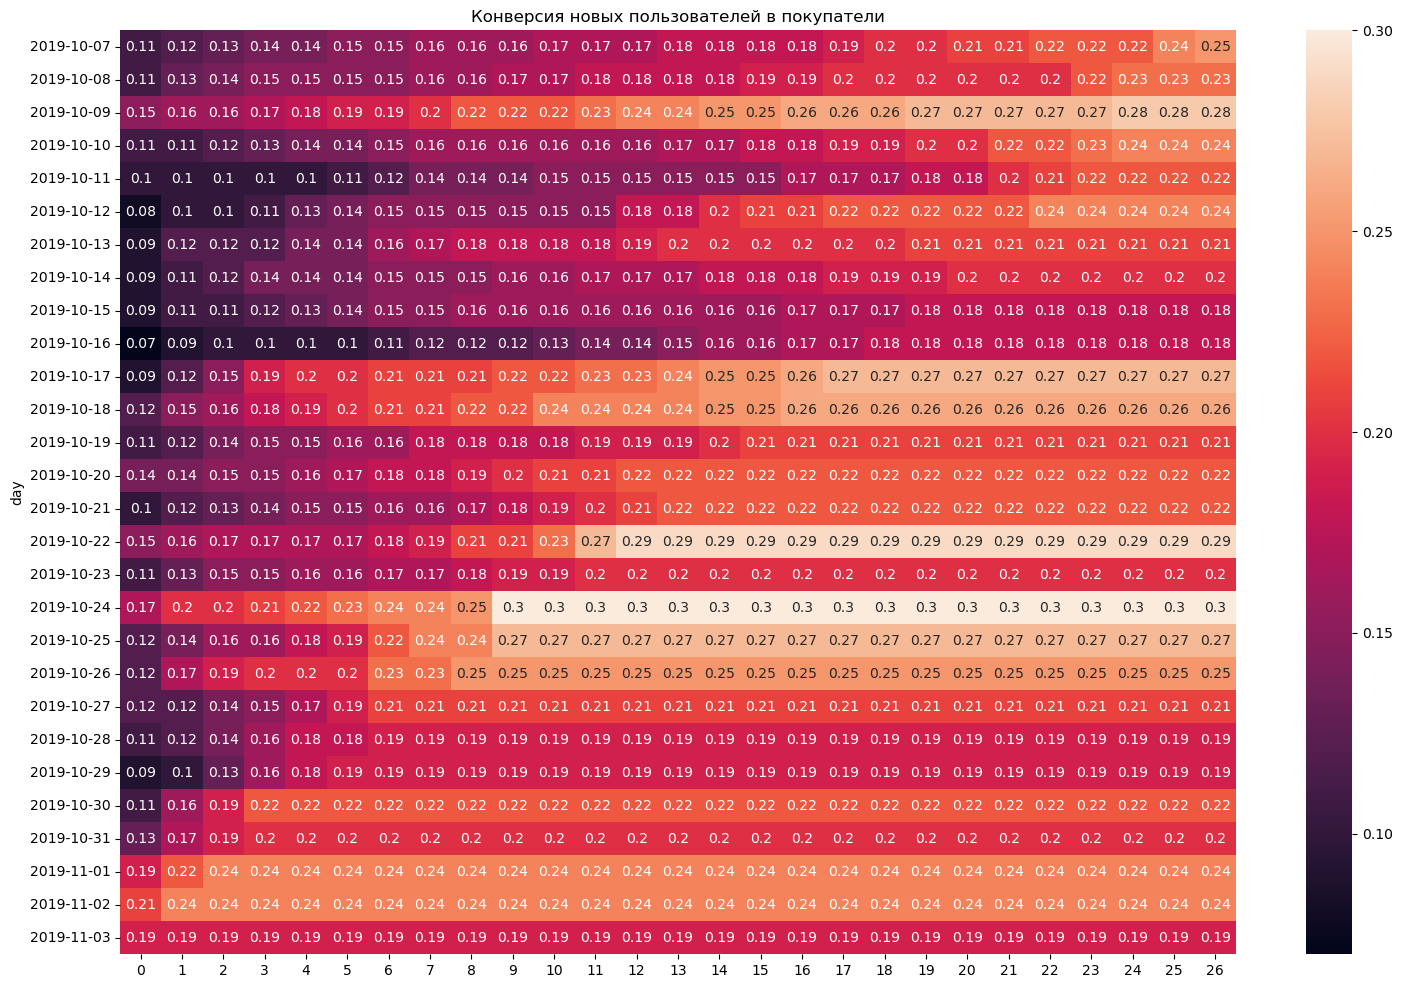

In [71]:
# построим heatmap для таблицы конверсии
plt.figure(figsize=(18,12)) 
plt.title('Конверсия новых пользователей в покупатели')
sns.heatmap(conversion_rate, 
            annot=True, 
            fmt='');
plt.show()

При анализе тепловой карты нужно учесть, что мы работали с частью данных. Мы получили треугольное заполнение данных. Поэтому, для каждой даты у нас свой горизонт анализа данных.

Хорошую конверсию показыают пользователи пришедшие:
- 08 октября
- 17 и 18 октября
- 22 октября
- с 24 по 26 октября

Плохой показатель:
- 15 и 16 октября

### Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?

In [72]:
# посчитаем покупателей в разрезе источника
source = df.query('event == "contacts_show"') \
    .groupby('source', as_index=False) \
    .agg({'user_id': 'nunique'}) \
    .rename(columns={'user_id': 'buyer'})

# добавим информацию о все пользователях
source = source.merge(
    (
        mobile_sourсes.groupby('source', as_index=False)['user_id']
            .count()
            .rename(columns={'user_id': 'total'})
    ), 
    how='left',
    on='source')

# посчитаем долю поукпателей
source['%_of_sourse'] = round((source.buyer * 100 / source.total), 2)
source['%_of_total'] = round((source.buyer * 100 / source.total.sum()), 2)

source

source  buyer  total  %_of_sourse  %_of_total
0  google    275   1129        24.36        6.41
1   other    228   1230        18.54        5.31
2  yandex    478   1934        24.72       11.13

Доля покупателей из источника `yandex` выше остальных - 11.1%. Однако это источник привел больше пользователей. Если рассматривать покупателей по источникам трафика, то доля платящих пользователей источника `google` и `yandex` однаковые - 24% 

### Какая группа лучше и по какому признаку?

Добавим колонок для статистики, на основани которых сделаемы выводы.

У нас уже есть:
- `buyer` число покупателей в группе
- `total` число пользователей в группе
- `%_of_sourse` доля покупателей от числа пользователей группы
- `%_of_total` доля покупателей от общего числа пользователей

добавим:
- `event` число действий пользователей
- `hours_in_app, median` медианное время 
- `hours_in_app, mean` среднее время
- `best_buyer` пользователи, совершившие более одной покупки

Т.к. большинство пользователей проводят в приложении менее одного дня переведём дельту во времени в часы

In [73]:
profiles['hours_in_app'] = profiles.last_ts - profiles.first_ts
profiles['hours_in_app'] = round((profiles['hours_in_app'] / np.timedelta64(1, 'h')), 0)

In [74]:
# добавим колонку с количеством совершенных действий
source = source.merge(
    (
        df.groupby('source', as_index=False)['event'].count()
    ),
    how='left',
    on='source')

# добавим время, проведённое в приложении
source= source.merge(
    (
        profiles.groupby('source')
            .agg({'hours_in_app': ('median', 'mean')})
    ),
    how='right',
    on='source')

C:\Users\Vitaliy\AppData\Local\Temp\ipykernel_7976\4106036114.py:10: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)



In [75]:
# добавим колонку числом пользователей, совершивших более одной покупки
tmp = df.query('event == "contacts_show"') \
    .groupby(['source', 'user_id'], as_index=False)['time'] \
    .count() \
    .query('time > 1')

tmp = tmp.groupby('source', as_index=False)['user_id'] \
    .count() \
    .rename(columns={'user_id': 'best_buyer'})

# объединим таблицы
source = source.merge(tmp, on='source')

source['%_best_buyer'] = round((source.best_buyer * 100 / source.total), 2)
source

source  buyer  total  %_of_sourse  %_of_total  event  \
0  google    275   1129        24.36        6.41  20158   
1   other    228   1230        18.54        5.31  19051   
2  yandex    478   1934        24.72       11.13  33845   

   (hours_in_app, median)  (hours_in_app, mean)  best_buyer  %_best_buyer  
0                     1.0             60.033658         178         15.77  
1                     1.0             67.233333         142         11.54  
2                     1.0             62.441055         281         14.53

Рассчитаем коэффициент корреляции Пирсона для определения связи числа действий пользователя с колисетвом покупок

In [76]:
# создадим датасет источник, id, покупки, события
users_event = df.query('event == "contacts_show"') \
            .groupby(['source', 'user_id'], as_index=False)['time'] \
            .count() \
            .rename(columns={'time': 'purchase'})


users_event = users_event.merge(
(df.groupby('user_id', as_index=False)['event'].count()
),
    on='user_id'
)

In [77]:
print('Коэффициент корреляции для google', users_event.query('source == "google"')['purchase'] \
      .corr(users_event.query('source == "google"')['event']))
print()
print('Коэффициент корреляции для yandex', users_event.query('source == "yandex"')['purchase'] \
      .corr(users_event.query('source == "yandex"')['event']))
print()
print('Коэффициент корреляции для other', users_event.query('source == "other"')['purchase'] \
      .corr(users_event.query('source == "other"')['event']))

Коэффициент корреляции для google 0.7299935986394577

Коэффициент корреляции для yandex 0.5089515544199925

Коэффициент корреляции для other 0.6820865673936479


**Делаемы выводы:**

Источник `yandex` приводит больше пользователей (45%). 24% пользователей из `google` и `yandex` совершают покупки. Пользователи из разных источников проводят одинаковое время в приложении. У `yandex` число пользователей, совершивших свыше одной покупки больше (281 пользователь). Доля таких пользователей у `google` больше (15.7% против 14.5% у `yandex`). Самый высокий коэффициект корреляции действий и покупок у источника `google`.

`yandex` приводит больше трафика    
`google` имеет лучшие показатели

### Пользователи пришедшие в приложение из разных источников демонстрируют разную конверсию в просмотры контактов

Для проверки гниротезы применем метод равенства долей.    
H0 - между пользователями из разных источников нет разницы.    
H1 - пользователи из разных источников имеют отличия

Проведём z-тест

![Изображение](https://github.com/vs-gorgan/practicum.yandex/blob/main/13_mobile_app/z_test.png)

In [78]:
def z_test(successes, trials):
    
    alpha = .05 # критический уровень статистической значимости
    successes = successes
    trials = trials
    
    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]
    
    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]
    
   
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    
    # разница пропорций в датасетах
    difference = p1 - p2
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

# создадим списки для google и yandex
g_y_successes = source.query('source == "google" or source == "yandex"')['buyer'].to_list()
g_y_trials = source.query('source == "google" or source == "yandex"')['total'].to_list()

# создадим списки для google и other
g_o_successes = source.query('source == "google" or source == "other"')['buyer'].to_list()
g_o_trials = source.query('source == "google" or source == "other"')['total'].to_list()

# создадим списки для yandex и other
y_o_successes = source.query('source == "yandex" or source == "other"')['buyer'].to_list()
y_o_trials = source.query('source == "yandex" or source == "other"')['total'].to_list()        
        
print('сравним источник google и yandex')
successes = g_y_successes
trials = g_y_trials

z_test(successes, trials)
print()

print('сравним источник google и other')
successes = g_o_successes
trials = g_o_trials

z_test(successes, trials)
print()

print('сравним источник other и yandex')
successes = g_y_successes
trials = g_y_trials

z_test(successes, trials)

сравним источник google и yandex
p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

сравним источник google и other
p-значение:  0.0005640941887214979
Отвергаем нулевую гипотезу: между долями есть значимая разница

сравним источник other и yandex
p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** пользователи, пришедшие из `google` демонстрируют лучшую конверсию в просмотры контактов.

### Собственная гипотеза. 

`h0` - Пользователи, добавившие объявление в избранное `favorites_add` чаще доходят до целевого действия - позвонить продавцу `contacts_show`.

Пользователей, совершивших покупку, нужно разбить на две группы: у которых ест событие `favorites_add` и без него.

Можно пойти сложнее, поставить условие, чтоб целевое действие `contacts_show` произошло по времени позже события `favorites_add`. Но т.к. у нас только месяц событий и часть значений не попали в выгрузку, пойдём малышковым способом (просто посчитаем количество).

In [79]:
print('Число всех пользователей ',len(mobile_sourсes))
print()
buyer = pd.DataFrame(df.query('event == "contacts_show"')['user_id'].unique()).rename(columns={0: 'user_id'})
print('Число пользователей, совершивших покупку', len(buyer))
print()
favorites = pd.DataFrame(df.query('event == "favorites_add"')['user_id'].unique()).rename(columns={0: 'user_id'})
print('Число пользователей, добавивших объявление в избранное', len(favorites))
print()
print('Число покупателей после добавления в избранное', len(buyer.merge(favorites, on='user_id', how='inner')))

Число всех пользователей  4293

Число пользователей, совершивших покупку 981

Число пользователей, добавивших объявление в избранное 351

Число покупателей после добавления в избранное 136


Данные собрали. Добавим их в нашу функцию.

In [81]:
# создадим списки
successes = np.array([len(buyer), len(buyer.merge(favorites, on='user_id', how='inner'))])
trials = np.array([len(mobile_sourсes), len(favorites)])

z_test(successes, trials)

p-значение:  2.096478546320668e-11
Отвергаем нулевую гипотезу: между долями есть значимая разница


Гипотеза подтвердилась. После добавление объявления в избранное пользователи чаще совершают покупки.

<hr style="border: 2px solid green;" />

## Общий вывод

В лог файл за месяц событий попало 4300 пользователей (из них 981 совершили покупку, 601 пользователь совершили более одной покупки)

В среднем пользователи совершают 6 покупок.

Пользователи приходят из 3-х источников. Почти половина пользователей пришло через yandex. Конверсия в покупателей лучше у `google`.

Пользователи добавившие объявленине в избранное чаще совершают покупки.

Медианное время от первого действия до целевого - 1 час.

71% пользователей имеют срок жизни в приложении меньше 2х дней.

**Рекомендации:**

Техническим специалистам выявить и устранить причину задвоения событий при логировании. Добавить в лог-файл время регистрации пользователя в системе, устройства входа и регион. Наличие указанной информации позволит провести более глубокий анализ, выявить дополнительные аномалии и дать рекомендации по улучшению работы сервиса. 

В ходе проведённого анализа не учитывались значения событий `search_1` — `search_7`. Мы установили, что самое популярное событие - показ пользователю рекомендованных объявлений `tips_show`. Лог-файл не содержит данных о категориях товара. Без этой информации сложно оценить эффективность работы механизма подбора и отображения пользователю рекомендованных объявлений.

Срок жизни пользователя в приложении очень короткий. Маркетологам следует разработать программы возврата пользователей. Например, если не было активности в приложении более недели, отправить на электронной почту информацию о скидках или список новых рекомендованных объявлений.

Тепловая карта конверсии демонстрирует хорошие показатели во второй половине месяца. Если в указанный период была реклама, акции или прочие маркетинговые инициативы по привлечению клиентов, то они показали положительный результат.